# Project on Data Sciences and Machine Learning

## Definition

##### Thes project is aimed at developing a machine-learning model to predict whether a diabetes patient is likely to be readmitted to the hospital within 30 days. Predicting readmission can help healthcare providers better allocate resources and improve patient care.

##### Data file - diabetic_data.csv The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days.

##### Additional data
ICD9 Classification.csv - Classification of ICD-9 Codes (International Classification of Diseases)
IDS_mapping.csv - Mapping of features admission_type_id, discharge_disposition_id and admission_source_id

##### Libraries
pandas, numpy, matplotlib, seaborn, scikit-learn

###### The trained models are evaluated based on performance metrics such as accuracy, precision, recall, and F1-score and AUC.

##### Algorithms used to train
Random forest classifier, Decision Tree Classifier, Gradient Boosting Classifier, k-nearest neighbor (k-NN) classifier, Logistic Regression

##### Project includes data pre-processing, model training, evaluation and prediction

##### Additional Information
The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

## Dataset Information

#### The instances represent hospitalized patient records diagnosed with diabetes. The dataset contains sensitive information about the age, gender, and race of the patients.

Instances: 101766, Feature: 50, Feature Type : Categorical, Integer, Target feature: readmitted, Has missing values : Yes

## Data Cleaning and preprocessing

In [879]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [880]:
# Load dataset
df = pd.read_csv('diabetic_data.csv')
df_original=df
# View first few rows
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [881]:
#Concise summary of dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [882]:
# attribute used with the Pandas library to determine the dimensions of a DataFrame
df.shape

(101766, 50)

In [883]:
#descriptive statistics of a DataFrame
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [884]:
#Function to list features and details
def feature_summary(df,val_sum):
    summary_df = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Null Percentage' : round(df.isnull().sum() / df.shape[0] *100 , 2),
        'Unique Count': df.nunique(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })

    summary_df = summary_df.sort_values(by=val_sum, ascending=False)
    
    return summary_df

In [885]:

feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
max_glu_serum               object            5346       96420   
A1Cresult                   object           17018       84748   
troglitazone                object          101766           0   
number_inpatient             int64          101766           0   
metformin-pioglitazone      object          101766           0   
metformin-rosiglitazone     object          101766           0   
miglitol                    object          101766           0   
nateglinide                 object          101766           0   
num_lab_procedures           int64          101766           0   
num_medications              int64          101766           0   
num_procedures               int64          101766           0   
number_diagnoses             int64          101766           0   
number_emergency             int64          101766           0   
number_outpatient            int64          101766           0   
tolbutamide                 object          101766           0   
metformin                   object          101766           0   
payer_code                  object          101766           0   
pioglitazone                object          101766           0   
race                        object          101766           0   
readmitted                  object          101766           0   
repaglinide                 object          101766           0   
rosiglitazone               object          101766           0   
time_in_hospital             int64          101766           0   
tolazamide                  object          101766           0   
patient_nbr                  int64          101766           0   
medical_specialty           object          101766           0   
acarbose                    object          101766           0   
insulin                     object          101766           0   
acetohexamide               object          101766           0   
admission_source_id          int64          101766           0   
admission_type_id            int64          101766           0   
age                         object          101766           0   
change                      object          101766           0   
chlorpropamide              object          101766           0   
citoglipton                 object          101766           0   
diabetesMed                 object          101766           0   
diag_1                      object          101766           0   
diag_2                      object          101766           0   
diag_3                      object          101766           0   
discharge_disposition_id     int64          101766           0   
encounter_id                 int64          101766           0   
examide                     object          101766           0   
gender                      object          101766           0   
glimepiride                 object          101766           0   
glimepiride-pioglitazone    object          101766           0   
glipizide                   object          101766           0   
glipizide-metformin         object          101766           0   
glyburide                   object          101766           0   
glyburide-metformin         object          101766           0   
weight                      object          101766           0   

                          Null Percentage  Unique Count      Min          Max  
max_glu_serum                       94.75             3      NaN          NaN  
A1Cresult                           83.28             3      NaN          NaN  
troglitazone                         0.00             2      NaN          NaN  
number_inpatient                     0.00            21      0.0         21.0  
metformin-pioglitazone               0.00             2      NaN          NaN  
metformin-rosiglitazone              0.00             2      NaN          NaN  
miglitol                             0.00             4      NaN          NaN  
nateglinide       

In [886]:
#column names of a DataFrame
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Data Set Description

### Features
encounter_id: Unique identifier of an encounter

patient_nbr: Unique identifier of a patient

race: Caucasian, Asian, African American, Hispanic, and other

gender: male, female, and unknown/invalid

age: in groups [0-10],[10.20],[20-30],[30-40] etc

weight: 96.86% of the population's 'weight' is not available and hence be dropped

admission_type_id

discharge_disposition_id

admission_source_id

time_in_hospital: number of days between admission and discharge

payer_code: The payer code is the one who pays to the hospital like medicare, self, etc.

medical_specialty: identifier of a specialty of the admitting physician

num_lab_procedures: Number of lab tests performed

num_procedures: Number of procedures (other than lab tests) performed

num_medications: Number of distinct medicationss administered

number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

number_emergency: Number of emergency visits of the patient in the year preceding the encounter

number_inpatient: Number of inpatient visits of the patient in the year preceding the encounter

diag_1: The primary diagnosis (coded as first three digits of ICD9)

diag_2: The secondary diagnosis (coded as first three digits of ICD9)

diag_3: The additional diagnosis (coded as first three digits of ICD9)

number_diagnoses: Number of diagnoses entered to the system 0%

max_glu_serum: Indicates the range of the result or if the test was not taken

A1Cresult: Indicates the range of the result or if the test was not taken

change: Indicates if there was a change in diabetic medications

diabetesMed: Indicates if there was any diabetic medication prescribed

### The dependent feature
readmitted : to see whether a patient was readmitted within 30 days or not

Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

### The below 23 features are medications Diabetes medications Indicates if there was any diabetic medication prescribed. 
metformin, 
repaglinide, 
nateglinide, 
chlorpropamide, 
glimepiride, 
acetohexamide, 
glipizide, 
glyburide, 
tolbutamide, 
pioglitazone, 
rosiglitazone, 
acarbose, 
miglitol, 
troglitazone, 
tolazamide, 
examide, 
citoglipton, 
insulin, 
glyburide-metformin, 
glipizide-metformin, 
glimepiride-pioglitazone, 
metformin-rosiglitazone, 
metformin-pioglitazone

## Data Dictionary

In [887]:
df_ids = pd.read_csv('IDS_mapping.csv')
df_ids


admission_type_id                                        description
0                  1                                          Emergency
1                  2                                             Urgent
2                  3                                           Elective
3                  4                                            Newborn
4                  5                                      Not Available
..               ...                                                ...
62                22   Transfer from hospital inpt/same fac reslt in...
63                23                          Born inside this hospital
64                24                         Born outside this hospital
65                25            Transfer from Ambulatory Surgery Center
66                26                              Transfer from Hospice

[67 rows x 2 columns]

In [888]:
#Find duplicate instances

df.duplicated().value_counts() 

False    101766
Name: count, dtype: int64

There are no duplicate instances

In [889]:
features=df.columns
features

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [890]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [891]:
#There are features with '?' which are unknown
for col in features:
    if (df[col] == '?').any():
        print(col)


race
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3


In [892]:
# Unknown values are recorded as '?' in dataset. Replacing with null
df.replace('?', np.nan, inplace=True)

In [893]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
weight                      object            3197       98569   
max_glu_serum               object            5346       96420   
A1Cresult                   object           17018       84748   
medical_specialty           object           51817       49949   
payer_code                  object           61510       40256   
race                        object           99493        2273   
diag_3                      object          100343        1423   
diag_2                      object          101408         358   
diag_1                      object          101745          21   
tolbutamide                 object          101766           0   
number_outpatient            int64          101766           0   
nateglinide                 object          101766           0   
num_lab_procedures           int64          101766           0   
num_medications              int64          101766           0   
num_procedures               int64          101766           0   
number_diagnoses             int64          101766           0   
number_emergency             int64          101766           0   
number_inpatient             int64          101766           0   
troglitazone                object          101766           0   
patient_nbr                  int64          101766           0   
tolazamide                  object          101766           0   
pioglitazone                object          101766           0   
metformin-rosiglitazone     object          101766           0   
readmitted                  object          101766           0   
repaglinide                 object          101766           0   
rosiglitazone               object          101766           0   
time_in_hospital             int64          101766           0   
miglitol                    object          101766           0   
admission_source_id          int64          101766           0   
metformin-pioglitazone      object          101766           0   
gender                      object          101766           0   
age                         object          101766           0   
change                      object          101766           0   
chlorpropamide              object          101766           0   
citoglipton                 object          101766           0   
diabetesMed                 object          101766           0   
discharge_disposition_id     int64          101766           0   
encounter_id                 int64          101766           0   
examide                     object          101766           0   
glimepiride                 object          101766           0   
admission_type_id            int64          101766           0   
glimepiride-pioglitazone    object          101766           0   
glipizide                   object          101766           0   
glipizide-metformin         object          101766           0   
glyburide                   object          101766           0   
glyburide-metformin         object          101766           0   
insulin                     object          101766           0   
acetohexamide               object          101766           0   
acarbose                    object          101766           0   
metformin                   object          101766           0   

                          Null Percentage  Unique Count      Min          Max  
weight                              96.86             9      NaN          NaN  
max_glu_serum                       94.75             3      NaN          NaN  
A1Cresult                           83.28             3      NaN          NaN  
medical_specialty                   49.08            72      NaN          NaN  
payer_code                          39.56            17      NaN          NaN  
race                                 2.23             5      NaN          NaN  
diag_3                               1.40           789      NaN          NaN  
diag_2            

readmitted is the dependent feature  to see whether a patient was readmitted within 30 days or not

In [894]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

<Axes: xlabel='readmitted'>

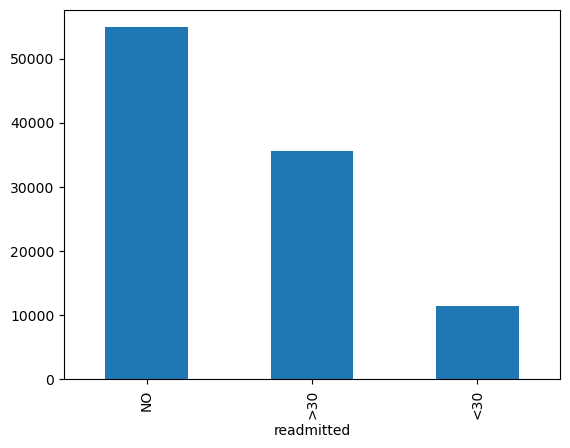

In [895]:

df['readmitted'].value_counts().plot(kind='bar')

We can make two classes
1. readmitted within 30 days = 1 since we are predicting whehter the patient needs re admission within 30 days
2. Not readmitted within 30 days or no admission = 0

In [896]:
def label(x):
    if x=='NO' or x=='>30':
        return 0
    elif x=='<30':
        return 1
df['readmitted'] = df['readmitted'].apply(label) # The df.apply() function in pandas is used to apply a function along an axis of a DataFrame. 

In [897]:
# this function return a dataframe with total observations for each category within a feature
def val_counts(df, feature):
    dic = {}
    for x in df[feature].unique():
        dic[x] = [len(df[df[feature]==x]) , (len(df[df[feature]==x])/len(df))*100]
    data = pd.DataFrame.from_dict(dic,orient='index', columns=['Total observations','%age of total data'])
    return data.sort_values(by=['Total observations'], ascending=False)

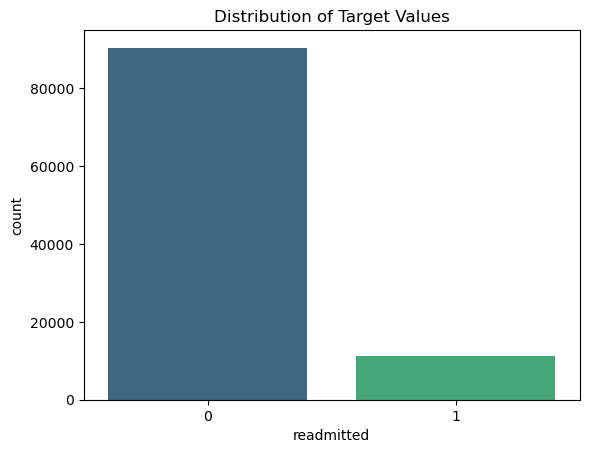

Total observations  %age of total data
0               90409           88.840084
1               11357           11.159916

In [898]:
sns.countplot(x = "readmitted", data = df,  palette='viridis')
plt.title("Distribution of Target Values")
plt.show()

val_counts(df,'readmitted')

Other features to drop
1. 96.86% of the population's 'weight' is not available
2. 'medical_specialty' and 'payer_code' are not available for about 50%.


In [899]:
#Dropping features
df=df.drop(['weight','medical_specialty','payer_code'], axis = 1)


In [900]:
feature_summary(df,'Unique Count')

Data Type  Non-Null Count  Null Count  \
encounter_id                 int64          101766           0   
patient_nbr                  int64          101766           0   
diag_3                      object          100343        1423   
diag_2                      object          101408         358   
diag_1                      object          101745          21   
num_lab_procedures           int64          101766           0   
num_medications              int64          101766           0   
number_outpatient            int64          101766           0   
number_emergency             int64          101766           0   
discharge_disposition_id     int64          101766           0   
number_inpatient             int64          101766           0   
admission_source_id          int64          101766           0   
number_diagnoses             int64          101766           0   
time_in_hospital             int64          101766           0   
age                         object          101766           0   
admission_type_id            int64          101766           0   
num_procedures               int64          101766           0   
race                        object           99493        2273   
nateglinide                 object          101766           0   
miglitol                    object          101766           0   
acarbose                    object          101766           0   
metformin                   object          101766           0   
insulin                     object          101766           0   
glyburide-metformin         object          101766           0   
glyburide                   object          101766           0   
glipizide                   object          101766           0   
glimepiride                 object          101766           0   
repaglinide                 object          101766           0   
rosiglitazone               object          101766           0   
chlorpropamide              object          101766           0   
pioglitazone                object          101766           0   
tolazamide                  object          101766           0   
A1Cresult                   object           17018       84748   
max_glu_serum               object            5346       96420   
gender                      object          101766           0   
metformin-rosiglitazone     object          101766           0   
metformin-pioglitazone      object          101766           0   
glipizide-metformin         object          101766           0   
glimepiride-pioglitazone    object          101766           0   
readmitted                   int64          101766           0   
diabetesMed                 object          101766           0   
change                      object          101766           0   
acetohexamide               object          101766           0   
tolbutamide                 object          101766           0   
troglitazone                object          101766           0   
examide                     object          101766           0   
citoglipton                 object          101766           0   

                          Null Percentage  Unique Count      Min          Max  
encounter_id                         0.00        101766  12522.0  443867222.0  
patient_nbr                          0.00         71518    135.0  189502619.0  
diag_3                               1.40           789      NaN          NaN  
diag_2                               0.35           748      NaN          NaN  
diag_1                               0.02           716      NaN          NaN  
num_lab_procedures                   0.00           118      1.0        132.0  
num_medications                      0.00            75      1.0         81.0  
number_outpatient                    0.00            39      0.0         42.0  
number_emergency                     0.00            33      0.0         76.0  
discharge_disposition_id             0.00            26 

The features to drop
1. all values of 'encounter_id' column are unique

In [901]:
df=df.drop(['encounter_id'],axis=1)

In [902]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [903]:
#this function returns a dataframe that contains the perccentage of each category of a particular feature that got readmitted
def category_ratio(feature):
    try:
        dic = {}
        for x in df[feature].unique():
            num = len(df[(df[feature]==x) & (df['readmitted']==1)])
            den = len(df[df[feature]==x])
            dic[x] = (num/den)*100
        data = pd.DataFrame.from_dict(dic,orient='index',columns=['%-age belonging to class 1'])
        return data.sort_values(by=['%-age belonging to class 1'], ascending=False)

    except ZeroDivisionError:
        # Handle ZeroDivisionError
        print("Cannot divide by zero.")


## Race

In [904]:
df.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

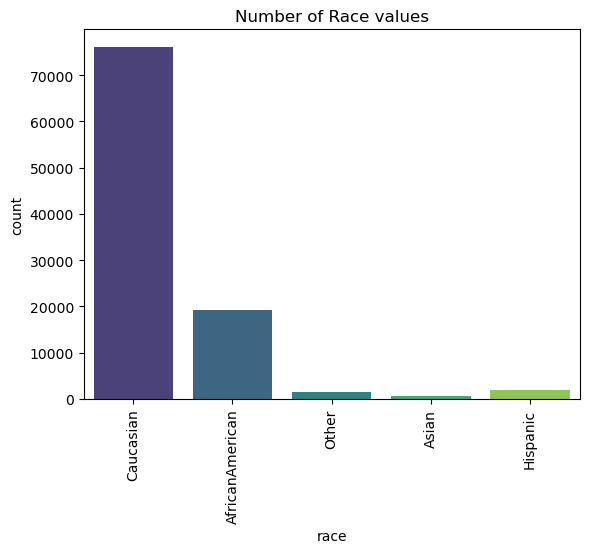

Proportion of Race
                 Total observations  %age of total data
Caucasian                     76099           74.778413
AfricanAmerican               19210           18.876639
Hispanic                       2037            2.001651
Other                          1506            1.479866
Asian                           641            0.629876
NaN                               0            0.000000


In [905]:
sns.countplot(x=df.race, data = df, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(val_counts(df,'race'))


In [906]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [907]:
# Since the percentage of the races other than Caucasian and AricanAmerican is low, grouping all to Other including null

df['race'] = df['race'].replace(['Hispanic', 'Asian', 'Other', np.NaN],'Other')


In [908]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
max_glu_serum               object            5346       96420   
A1Cresult                   object           17018       84748   
diag_3                      object          100343        1423   
diag_2                      object          101408         358   
diag_1                      object          101745          21   
acetohexamide               object          101766           0   
patient_nbr                  int64          101766           0   
nateglinide                 object          101766           0   
num_lab_procedures           int64          101766           0   
num_medications              int64          101766           0   
num_procedures               int64          101766           0   
number_diagnoses             int64          101766           0   
number_emergency             int64          101766           0   
number_inpatient             int64          101766           0   
number_outpatient            int64          101766           0   
race                        object          101766           0   
pioglitazone                object          101766           0   
metformin-rosiglitazone     object          101766           0   
readmitted                   int64          101766           0   
repaglinide                 object          101766           0   
rosiglitazone               object          101766           0   
time_in_hospital             int64          101766           0   
tolazamide                  object          101766           0   
tolbutamide                 object          101766           0   
miglitol                    object          101766           0   
metformin                   object          101766           0   
metformin-pioglitazone      object          101766           0   
admission_source_id          int64          101766           0   
admission_type_id            int64          101766           0   
age                         object          101766           0   
change                      object          101766           0   
chlorpropamide              object          101766           0   
citoglipton                 object          101766           0   
diabetesMed                 object          101766           0   
discharge_disposition_id     int64          101766           0   
examide                     object          101766           0   
gender                      object          101766           0   
glimepiride                 object          101766           0   
glimepiride-pioglitazone    object          101766           0   
glipizide                   object          101766           0   
glipizide-metformin         object          101766           0   
glyburide                   object          101766           0   
glyburide-metformin         object          101766           0   
insulin                     object          101766           0   
acarbose                    object          101766           0   
troglitazone                object          101766           0   

                          Null Percentage  Unique Count    Min          Max  
max_glu_serum                       94.75             3    NaN          NaN  
A1Cresult                           83.28             3    NaN          NaN  
diag_3                               1.40           789    NaN          NaN  
diag_2                               0.35           748    NaN          NaN  
diag_1                               0.02           716    NaN          NaN  
acetohexamide                        0.00             2    NaN          NaN  
patient_nbr                          0.00         71518  135.0  189502619.0  
nateglinide                          0.00             4    NaN          NaN  
num_lab_procedures                   0.00           118    1.0        132.0  
num_medications                      0.00            75    1.0         81.0  
num_procedures                       0.00             7    0.0  

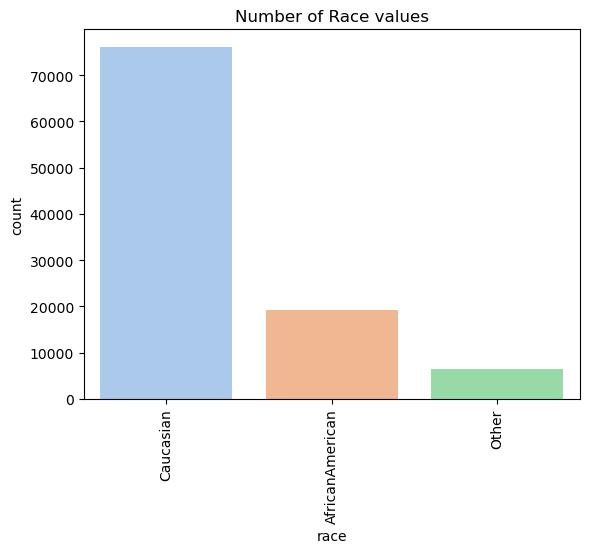

Total observations  %age of total data
Caucasian                     76099           74.778413
AfricanAmerican               19210           18.876639
Other                          6457            6.344948

In [909]:
sns.countplot(x=df.race, data = df, palette='pastel')
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

val_counts(df,'race')

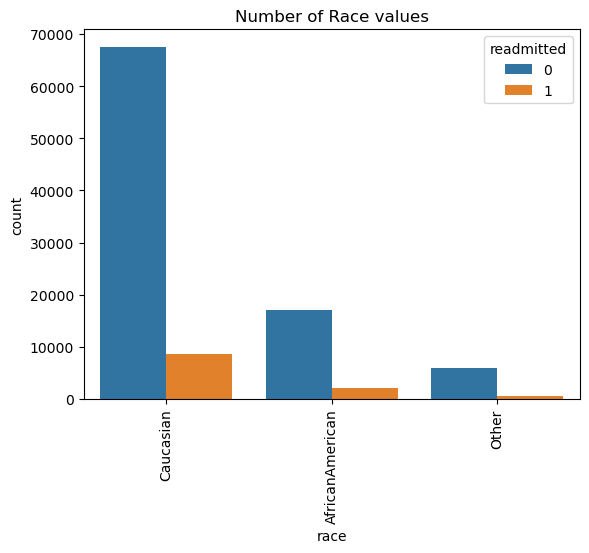

%-age belonging to class 1
Caucasian                         11.290556
AfricanAmerican                   11.218116
Other                              9.447112

In [910]:
sns.countplot(x=df.race, data = df, hue='readmitted')
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

category_ratio('race')

We can see that the probability of readmission is almost equal

In [911]:
feature_summary(df,'Unique Count')

Data Type  Non-Null Count  Null Count  \
patient_nbr                  int64          101766           0   
diag_3                      object          100343        1423   
diag_2                      object          101408         358   
diag_1                      object          101745          21   
num_lab_procedures           int64          101766           0   
num_medications              int64          101766           0   
number_outpatient            int64          101766           0   
number_emergency             int64          101766           0   
discharge_disposition_id     int64          101766           0   
number_inpatient             int64          101766           0   
admission_source_id          int64          101766           0   
number_diagnoses             int64          101766           0   
time_in_hospital             int64          101766           0   
age                         object          101766           0   
admission_type_id            int64          101766           0   
num_procedures               int64          101766           0   
insulin                     object          101766           0   
miglitol                    object          101766           0   
metformin                   object          101766           0   
nateglinide                 object          101766           0   
acarbose                    object          101766           0   
glimepiride                 object          101766           0   
glyburide-metformin         object          101766           0   
glyburide                   object          101766           0   
glipizide                   object          101766           0   
pioglitazone                object          101766           0   
repaglinide                 object          101766           0   
rosiglitazone               object          101766           0   
chlorpropamide              object          101766           0   
race                        object          101766           0   
tolazamide                  object          101766           0   
A1Cresult                   object           17018       84748   
max_glu_serum               object            5346       96420   
gender                      object          101766           0   
metformin-rosiglitazone     object          101766           0   
metformin-pioglitazone      object          101766           0   
glipizide-metformin         object          101766           0   
glimepiride-pioglitazone    object          101766           0   
readmitted                   int64          101766           0   
diabetesMed                 object          101766           0   
change                      object          101766           0   
acetohexamide               object          101766           0   
tolbutamide                 object          101766           0   
troglitazone                object          101766           0   
examide                     object          101766           0   
citoglipton                 object          101766           0   

                          Null Percentage  Unique Count    Min          Max  
patient_nbr                          0.00         71518  135.0  189502619.0  
diag_3                               1.40           789    NaN          NaN  
diag_2                               0.35           748    NaN          NaN  
diag_1                               0.02           716    NaN          NaN  
num_lab_procedures                   0.00           118    1.0        132.0  
num_medications                      0.00            75    1.0         81.0  
number_outpatient                    0.00            39    0.0         42.0  
number_emergency                     0.00            33    0.0         76.0  
discharge_disposition_id             0.00            26    1.0         28.0  
number_inpatient                     0.00            21    0.0         21.0  
admission_source_id                  0.00            17    1.0  

## Gender

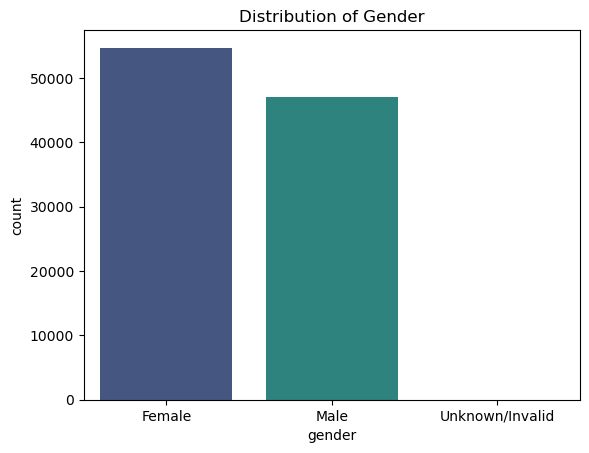

Total observations  %age of total data
Female                        54708           53.758623
Male                          47055           46.238429
Unknown/Invalid                   3            0.002948

In [912]:
sns.countplot(x = "gender", data = df,palette='viridis')
plt.title("Distribution of Gender")
plt.show()

val_counts(df,'gender')

In [913]:
#dropping the instances with 'Unknown/Invalid'
gender_index = df[df.gender == 'Unknown/Invalid'].index
df = df.drop(gender_index, axis=0)

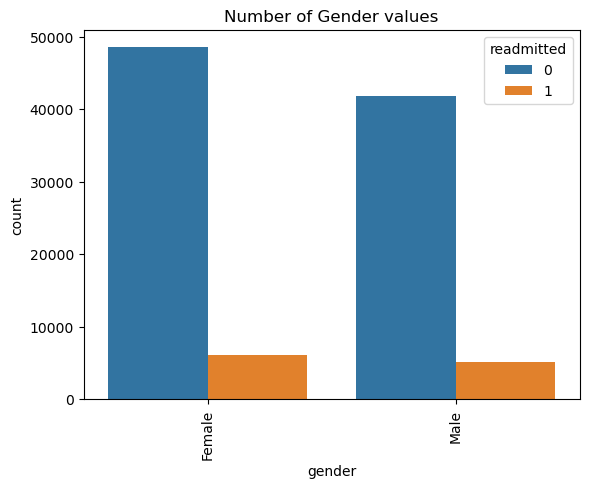

%-age belonging to class 1
Female                   11.245156
Male                     11.061524

In [914]:
sns.countplot(x=df.gender, data = df, hue='readmitted')
plt.xticks(rotation=90)
plt.title("Number of Gender values")
plt.show()

category_ratio('gender')

We can see that the probability of readmission is almost equal

## Age

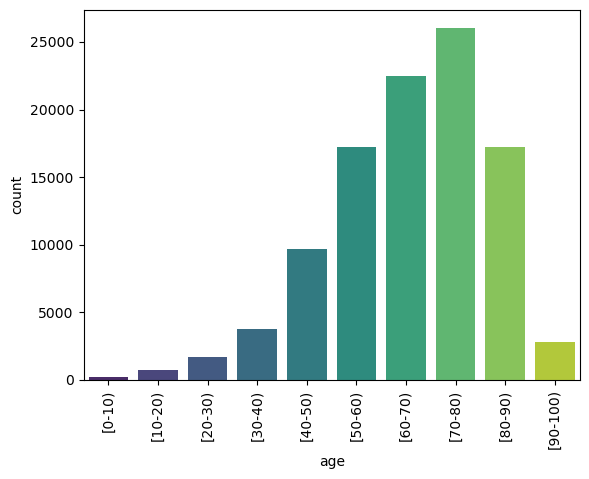

In [915]:
sns.countplot(x="age", data = df, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

### To remove the parenthesis notation and make the Age variable a numeric value, used mean to change

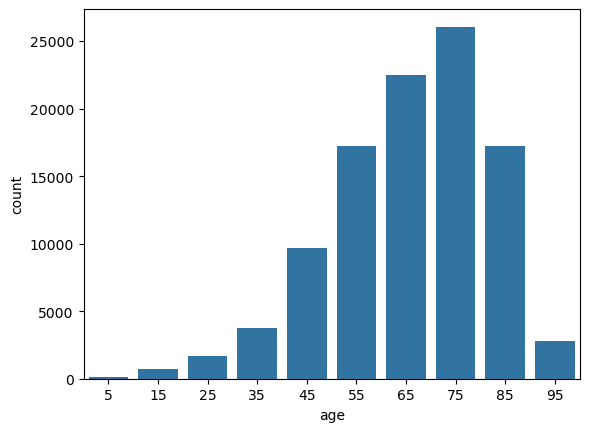

In [916]:
df.age = df.age.replace({
                        "[0-10)":5,
                        "[10-20)":15,
                        "[20-30)":25,
                        "[30-40)":35,
                        "[40-50)":45,
                        "[50-60)":55,
                        "[60-70)":65,
                        "[70-80)":75,                       
                        "[80-90)":85,
                        "[90-100)":95     
                         })

sns.countplot(x="age", data = df)
#plt.xticks(rotation = 90)
plt.show()

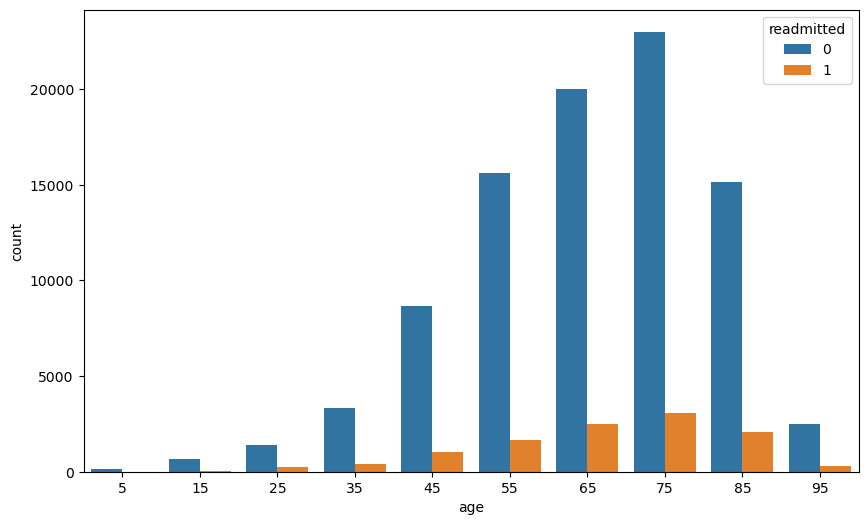

%-age belonging to class 1
25                   14.242607
85                   12.083503
75                   11.773958
35                   11.231788
65                   11.128903
95                   11.099177
45                   10.604027
55                    9.666203
15                    5.788712
5                     1.863354

In [917]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='readmitted', data=df)
plt.show()
category_ratio('age')

In [918]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
max_glu_serum               object            5346       96417   
A1Cresult                   object           17018       84745   
diag_3                      object          100340        1423   
diag_2                      object          101405         358   
diag_1                      object          101742          21   
acetohexamide               object          101763           0   
patient_nbr                  int64          101763           0   
nateglinide                 object          101763           0   
num_lab_procedures           int64          101763           0   
num_medications              int64          101763           0   
num_procedures               int64          101763           0   
number_diagnoses             int64          101763           0   
number_emergency             int64          101763           0   
number_inpatient             int64          101763           0   
number_outpatient            int64          101763           0   
race                        object          101763           0   
pioglitazone                object          101763           0   
metformin-rosiglitazone     object          101763           0   
readmitted                   int64          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
time_in_hospital             int64          101763           0   
tolazamide                  object          101763           0   
tolbutamide                 object          101763           0   
miglitol                    object          101763           0   
metformin                   object          101763           0   
metformin-pioglitazone      object          101763           0   
admission_source_id          int64          101763           0   
admission_type_id            int64          101763           0   
age                          int64          101763           0   
change                      object          101763           0   
chlorpropamide              object          101763           0   
citoglipton                 object          101763           0   
diabetesMed                 object          101763           0   
discharge_disposition_id     int64          101763           0   
examide                     object          101763           0   
gender                      object          101763           0   
glimepiride                 object          101763           0   
glimepiride-pioglitazone    object          101763           0   
glipizide                   object          101763           0   
glipizide-metformin         object          101763           0   
glyburide                   object          101763           0   
glyburide-metformin         object          101763           0   
insulin                     object          101763           0   
acarbose                    object          101763           0   
troglitazone                object          101763           0   

                          Null Percentage  Unique Count    Min          Max  
max_glu_serum                       94.75             3    NaN          NaN  
A1Cresult                           83.28             3    NaN          NaN  
diag_3                               1.40           789    NaN          NaN  
diag_2                               0.35           748    NaN          NaN  
diag_1                               0.02           716    NaN          NaN  
acetohexamide                        0.00             2    NaN          NaN  
patient_nbr                          0.00         71515  135.0  189502619.0  
nateglinide                          0.00             4    NaN          NaN  
num_lab_procedures                   0.00           118    1.0        132.0  
num_medications                      0.00            75    1.0         81.0  
num_procedures                       0.00             7    0.0  

In [919]:
# total unique patients
len(df.patient_nbr), df.patient_nbr.nunique()

(101763, 71515)

In [920]:
# locate number of patient visits using patient_id
df.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71515, dtype: int64

In [921]:
df_ptnbr=df[df['patient_nbr']==88785891]
df_ptnbr[['readmitted','A1Cresult','number_inpatient']]

readmitted A1Cresult  number_inpatient
38307            0       NaN                 0
40252            1       NaN                 2
40661            0       NaN                 3
44515            1       NaN                 5
45147            1       NaN                 6
45986            1       NaN                 7
50167            1       NaN                 9
50393            1       NaN                 9
50773            1       NaN                10
51519            1       NaN                11
52057            0       NaN                12
53771            1       NaN                13
54497            0       NaN                13
60263            0       NaN                12
62759            1       NaN                11
63165            0       NaN                13
65667            0        >8                11
67968            0        >8                12
71029            1       NaN                 7
72068            0       NaN                 7
74405            1       NaN                 8
74876            1       NaN                 9
75267            0       NaN                 9
76525            1       NaN                10
76907            0       NaN                11
78355            1       NaN                 9
78882            1       NaN                10
79202            1        >8                11
79467            0       NaN                12
82693            0       NaN                11
87063            1        >8                11
87854            1       NaN                11
88392            0       NaN                12
89964            0       NaN                13
90913            1        >8                11
91444            1       NaN                12
97433            1       NaN                 8
97732            0       NaN                10
99950            0       NaN                12
101385           1       NaN                 9

In [922]:
df.patient_nbr.nunique()

71515

In [923]:
df.shape

(101763, 46)

### 'patient_nbr' is almost unique, so we can drop this feature

In [924]:
df = df.drop('patient_nbr', axis=1)

In [925]:
df.shape

(101763, 45)

In [926]:
feature_summary(df,'Unique Count')

Data Type  Non-Null Count  Null Count  \
diag_3                      object          100340        1423   
diag_2                      object          101405         358   
diag_1                      object          101742          21   
num_lab_procedures           int64          101763           0   
num_medications              int64          101763           0   
number_outpatient            int64          101763           0   
number_emergency             int64          101763           0   
discharge_disposition_id     int64          101763           0   
number_inpatient             int64          101763           0   
admission_source_id          int64          101763           0   
number_diagnoses             int64          101763           0   
time_in_hospital             int64          101763           0   
age                          int64          101763           0   
admission_type_id            int64          101763           0   
num_procedures               int64          101763           0   
miglitol                    object          101763           0   
glyburide-metformin         object          101763           0   
nateglinide                 object          101763           0   
metformin                   object          101763           0   
acarbose                    object          101763           0   
insulin                     object          101763           0   
glyburide                   object          101763           0   
glipizide                   object          101763           0   
glimepiride                 object          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
chlorpropamide              object          101763           0   
pioglitazone                object          101763           0   
race                        object          101763           0   
tolazamide                  object          101763           0   
A1Cresult                   object           17018       84745   
max_glu_serum               object            5346       96417   
metformin-rosiglitazone     object          101763           0   
metformin-pioglitazone      object          101763           0   
glipizide-metformin         object          101763           0   
glimepiride-pioglitazone    object          101763           0   
gender                      object          101763           0   
readmitted                   int64          101763           0   
diabetesMed                 object          101763           0   
change                      object          101763           0   
acetohexamide               object          101763           0   
tolbutamide                 object          101763           0   
troglitazone                object          101763           0   
examide                     object          101763           0   
citoglipton                 object          101763           0   

                          Null Percentage  Unique Count  Min    Max  
diag_3                               1.40           789  NaN    NaN  
diag_2                               0.35           748  NaN    NaN  
diag_1                               0.02           716  NaN    NaN  
num_lab_procedures                   0.00           118  1.0  132.0  
num_medications                      0.00            75  1.0   81.0  
number_outpatient                    0.00            39  0.0   42.0  
number_emergency                     0.00            33  0.0   76.0  
discharge_disposition_id             0.00            26  1.0   28.0  
number_inpatient                     0.00            21  0.0   21.0  
admission_source_id                  0.00            17  1.0   25.0  
number_diagnoses                     0.00            16  1.0   16.0  
time_in_hospital                     0.00            14  1.0   14.0  
age                                  0.00            10  5.0   95.0  
admissio

In [927]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
max_glu_serum               object            5346       96417   
A1Cresult                   object           17018       84745   
diag_3                      object          100340        1423   
diag_2                      object          101405         358   
diag_1                      object          101742          21   
number_inpatient             int64          101763           0   
metformin-rosiglitazone     object          101763           0   
miglitol                    object          101763           0   
nateglinide                 object          101763           0   
num_lab_procedures           int64          101763           0   
num_medications              int64          101763           0   
num_procedures               int64          101763           0   
number_diagnoses             int64          101763           0   
number_emergency             int64          101763           0   
tolbutamide                 object          101763           0   
tolazamide                  object          101763           0   
metformin-pioglitazone      object          101763           0   
pioglitazone                object          101763           0   
race                        object          101763           0   
readmitted                   int64          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
time_in_hospital             int64          101763           0   
number_outpatient            int64          101763           0   
insulin                     object          101763           0   
metformin                   object          101763           0   
acarbose                    object          101763           0   
acetohexamide               object          101763           0   
admission_source_id          int64          101763           0   
admission_type_id            int64          101763           0   
age                          int64          101763           0   
change                      object          101763           0   
chlorpropamide              object          101763           0   
citoglipton                 object          101763           0   
diabetesMed                 object          101763           0   
discharge_disposition_id     int64          101763           0   
examide                     object          101763           0   
gender                      object          101763           0   
glimepiride                 object          101763           0   
glimepiride-pioglitazone    object          101763           0   
glipizide                   object          101763           0   
glipizide-metformin         object          101763           0   
glyburide                   object          101763           0   
glyburide-metformin         object          101763           0   
troglitazone                object          101763           0   

                          Null Percentage  Unique Count  Min    Max  
max_glu_serum                       94.75             3  NaN    NaN  
A1Cresult                           83.28             3  NaN    NaN  
diag_3                               1.40           789  NaN    NaN  
diag_2                               0.35           748  NaN    NaN  
diag_1                               0.02           716  NaN    NaN  
number_inpatient                     0.00            21  0.0   21.0  
metformin-rosiglitazone              0.00             2  NaN    NaN  
miglitol                             0.00             4  NaN    NaN  
nateglinide                          0.00             4  NaN    NaN  
num_lab_procedures                   0.00           118  1.0  132.0  
num_medications                      0.00            75  1.0   81.0  
num_procedures                       0.00             7  0.0    6.0  
number_diagnoses                     0.00            16  1.0   16.0  
number_e

diag_1, diag_2 and diag_3 contain ICD9 codes and there are many unique codes. We will group into diagnosis groups.
Group Names are
1-Circulatory
2-Respiratory
3-Digestive
4-Diabetes
5-Injury
6-Musculoskeletal
7-Genitourinary
8-Neoplasms
9-Other

Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record
https://onlinelibrary.wiley.com/doi/10.1155/2014/781670

Table 2. Values of the primary diagnosis in the final dataset. In the analysis, groups that covered less than 3.5% of encounters were grouped into “other” category.


Text(0.5, 0, 'ICD-9 Diagnosis Code')

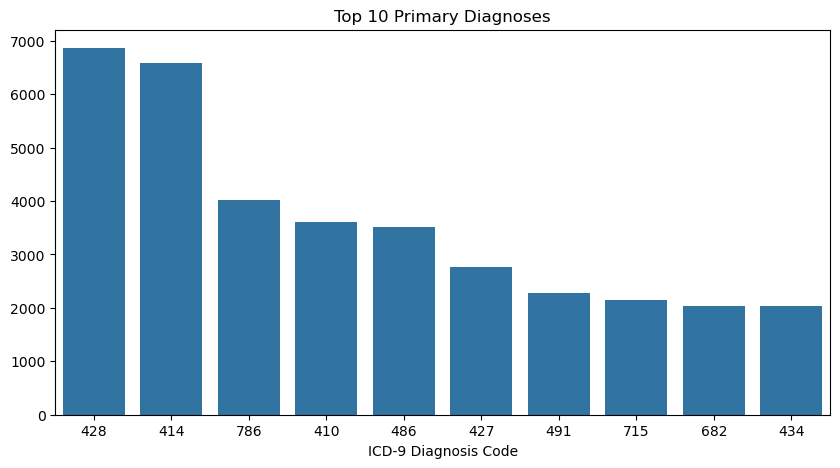

In [928]:
top_diag1 = df['diag_1'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_diag1.index.astype(str), y=top_diag1.values)
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')

In [929]:
df['diag_1'].nunique()

716

In [930]:
#Classification of ICD-9 Codes (International Classification of Diseases)

#function to categorize
def cat_diag(code):
    
    try:
        code_num = int(float(code))  # convert to integer
    except ValueError:
        return 'Other'
        
    if code.startswith('250'):
        return 'Diabetes'
    if 390 <= code_num <= 459 or code_num == 785:
        return 'Circulatory'
    elif 460 <= code_num <= 519 or code_num == 786:
        return 'Respiratory'
    elif 520 <= code_num <= 579 or code_num == 787:
        return 'Digestive'
    elif 580 <= code_num <= 629 or code_num == 788:
        return 'Genitourinary'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal'
    elif 800 <= code_num <= 999:
        return 'Injury'
    else:
        return 'Other'

# Apply the function
df['diag_1'] = df['diag_1'].apply(cat_diag)
df['diag_2'] = df['diag_2'].apply(cat_diag)
df['diag_3'] = df['diag_3'].apply(cat_diag)

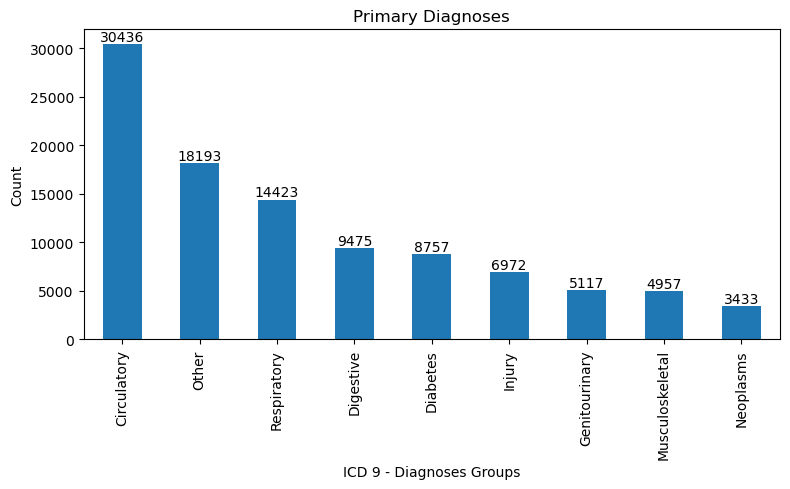

In [931]:

# Get value counts
diag_counts = df['diag_1'].value_counts()

# Create bar plot and capture Axes
ax = diag_counts.plot(kind='bar', title='Primary Diagnoses', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(diag_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('ICD 9 - Diagnoses Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

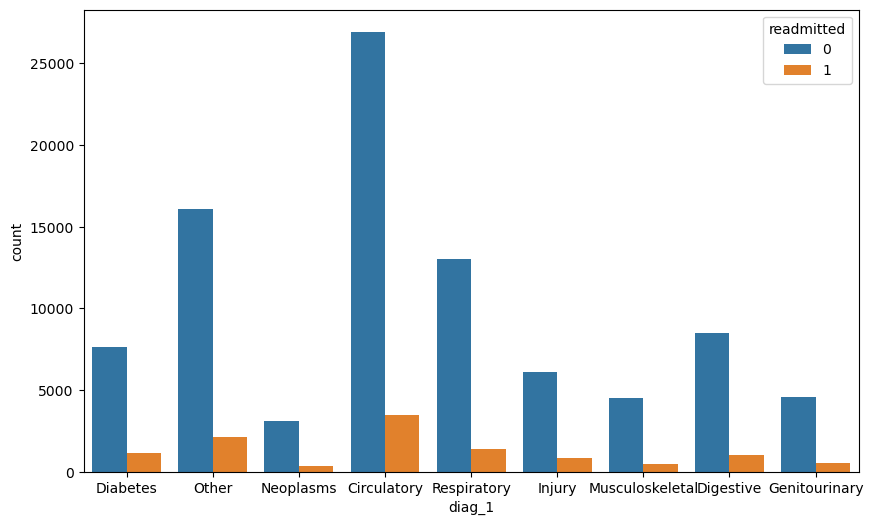

%-age belonging to class 1
Diabetes                          12.983899
Injury                            12.248996
Other                             11.493432
Circulatory                       11.450256
Genitourinary                     10.846199
Digestive                         10.712401
Neoplasms                         10.078648
Respiratory                        9.727519
Musculoskeletal                    9.501715

In [932]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='diag_1', hue='readmitted', data=df)
plt.show()
category_ratio('diag_1')

In [933]:
df[['diag_1', 'diag_2', 'diag_3']].head()

diag_1     diag_2       diag_3
0   Diabetes      Other        Other
1      Other   Diabetes        Other
2      Other   Diabetes        Other
3      Other   Diabetes  Circulatory
4  Neoplasms  Neoplasms     Diabetes

In [934]:
for i in df[['diag_1', 'diag_2', 'diag_3']]:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

diag_1:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diag_2:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diag_3:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']



In [935]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
max_glu_serum               object            5346       96417   
A1Cresult                   object           17018       84745   
metformin-pioglitazone      object          101763           0   
metformin-rosiglitazone     object          101763           0   
miglitol                    object          101763           0   
nateglinide                 object          101763           0   
num_lab_procedures           int64          101763           0   
num_medications              int64          101763           0   
num_procedures               int64          101763           0   
number_diagnoses             int64          101763           0   
number_emergency             int64          101763           0   
number_inpatient             int64          101763           0   
number_outpatient            int64          101763           0   
pioglitazone                object          101763           0   
race                        object          101763           0   
readmitted                   int64          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
time_in_hospital             int64          101763           0   
tolazamide                  object          101763           0   
tolbutamide                 object          101763           0   
metformin                   object          101763           0   
insulin                     object          101763           0   
acarbose                    object          101763           0   
glyburide-metformin         object          101763           0   
acetohexamide               object          101763           0   
admission_source_id          int64          101763           0   
admission_type_id            int64          101763           0   
age                          int64          101763           0   
change                      object          101763           0   
chlorpropamide              object          101763           0   
citoglipton                 object          101763           0   
diabetesMed                 object          101763           0   
diag_1                      object          101763           0   
diag_2                      object          101763           0   
diag_3                      object          101763           0   
discharge_disposition_id     int64          101763           0   
examide                     object          101763           0   
gender                      object          101763           0   
glimepiride                 object          101763           0   
glimepiride-pioglitazone    object          101763           0   
glipizide                   object          101763           0   
glipizide-metformin         object          101763           0   
glyburide                   object          101763           0   
troglitazone                object          101763           0   

                          Null Percentage  Unique Count  Min    Max  
max_glu_serum                       94.75             3  NaN    NaN  
A1Cresult                           83.28             3  NaN    NaN  
metformin-pioglitazone               0.00             2  NaN    NaN  
metformin-rosiglitazone              0.00             2  NaN    NaN  
miglitol                             0.00             4  NaN    NaN  
nateglinide                          0.00             4  NaN    NaN  
num_lab_procedures                   0.00           118  1.0  132.0  
num_medications                      0.00            75  1.0   81.0  
num_procedures                       0.00             7  0.0    6.0  
number_diagnoses                     0.00            16  1.0   16.0  
number_emergency                     0.00            33  0.0   76.0  
number_inpatient                     0.00            21  0.0   21.0  
number_outpatient                    0.00            39  0.0   42.0  
pioglita

In [936]:
df.shape

(101763, 45)

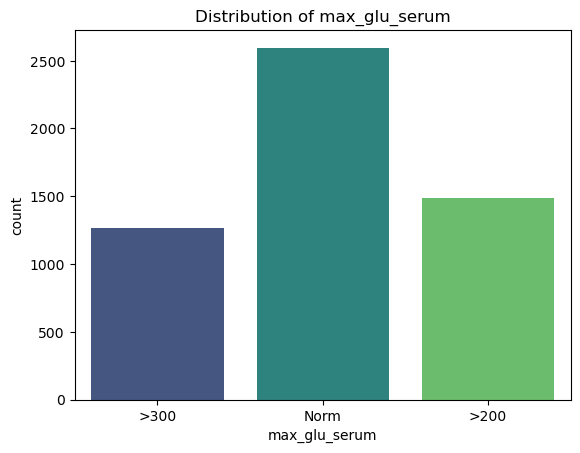

Total observations  %age of total data
Norm                2597            2.552008
>200                1485            1.459273
>300                1264            1.242102
NaN                    0            0.000000

In [937]:
sns.countplot(x = 'max_glu_serum', data = df,palette='viridis')
plt.title('Distribution of max_glu_serum')
plt.show()

val_counts(df,'max_glu_serum')

In [938]:
df.max_glu_serum.value_counts(dropna=False)

max_glu_serum
NaN     96417
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

In [939]:
df['max_glu_serum']=df['max_glu_serum'].replace({np.NaN:0,"None":0, 'Norm':1, '>200':2, '>300':2})

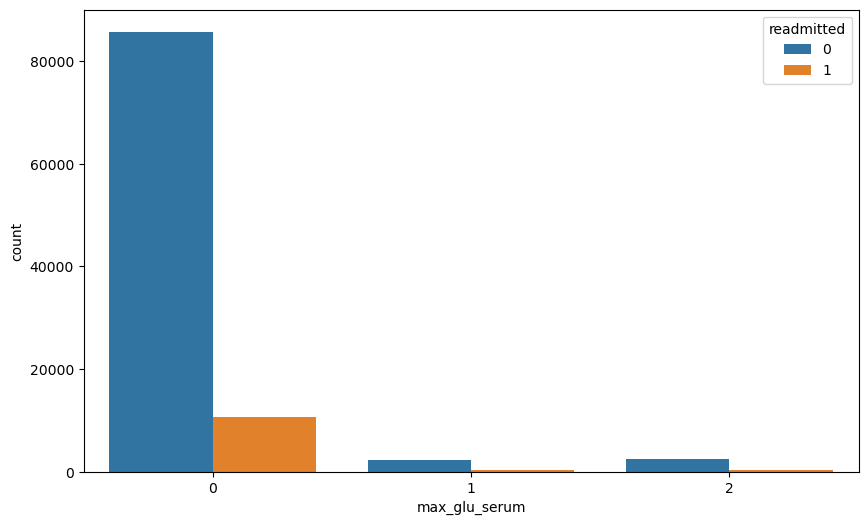

%-age belonging to class 1
2                   13.313932
1                   11.359261
0                   11.093479

In [940]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
plt.show()
category_ratio('max_glu_serum')

In [941]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
A1Cresult                   object           17018       84745   
max_glu_serum                int64          101763           0   
metformin-pioglitazone      object          101763           0   
metformin-rosiglitazone     object          101763           0   
miglitol                    object          101763           0   
nateglinide                 object          101763           0   
num_lab_procedures           int64          101763           0   
num_medications              int64          101763           0   
num_procedures               int64          101763           0   
number_diagnoses             int64          101763           0   
number_emergency             int64          101763           0   
number_inpatient             int64          101763           0   
number_outpatient            int64          101763           0   
pioglitazone                object          101763           0   
race                        object          101763           0   
readmitted                   int64          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
time_in_hospital             int64          101763           0   
tolazamide                  object          101763           0   
tolbutamide                 object          101763           0   
metformin                   object          101763           0   
insulin                     object          101763           0   
acarbose                    object          101763           0   
glyburide-metformin         object          101763           0   
acetohexamide               object          101763           0   
admission_source_id          int64          101763           0   
admission_type_id            int64          101763           0   
age                          int64          101763           0   
change                      object          101763           0   
chlorpropamide              object          101763           0   
citoglipton                 object          101763           0   
diabetesMed                 object          101763           0   
diag_1                      object          101763           0   
diag_2                      object          101763           0   
diag_3                      object          101763           0   
discharge_disposition_id     int64          101763           0   
examide                     object          101763           0   
gender                      object          101763           0   
glimepiride                 object          101763           0   
glimepiride-pioglitazone    object          101763           0   
glipizide                   object          101763           0   
glipizide-metformin         object          101763           0   
glyburide                   object          101763           0   
troglitazone                object          101763           0   

                          Null Percentage  Unique Count  Min    Max  
A1Cresult                           83.28             3  NaN    NaN  
max_glu_serum                        0.00             3  0.0    2.0  
metformin-pioglitazone               0.00             2  NaN    NaN  
metformin-rosiglitazone              0.00             2  NaN    NaN  
miglitol                             0.00             4  NaN    NaN  
nateglinide                          0.00             4  NaN    NaN  
num_lab_procedures                   0.00           118  1.0  132.0  
num_medications                      0.00            75  1.0   81.0  
num_procedures                       0.00             7  0.0    6.0  
number_diagnoses                     0.00            16  1.0   16.0  
number_emergency                     0.00            33  0.0   76.0  
number_inpatient                     0.00            21  0.0   21.0  
number_outpatient                    0.00            39  0.0   42.0  
pioglita

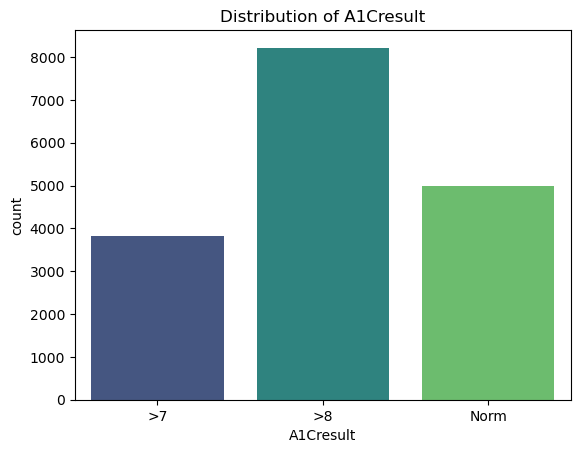

Total observations  %age of total data
>8                  8216            8.073661
Norm                4990            4.903550
>7                  3812            3.745959
NaN                    0            0.000000

In [942]:
sns.countplot(x = 'A1Cresult', data = df,palette='viridis')
plt.title('Distribution of A1Cresult')
plt.show()

val_counts(df,'A1Cresult')

In [943]:
df.A1Cresult.value_counts(dropna=False)

A1Cresult
NaN     84745
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64

In [944]:
df['A1Cresult']=df['A1Cresult'].replace({np.NaN:0, 'Norm':1, '>7':2, '>8':2})

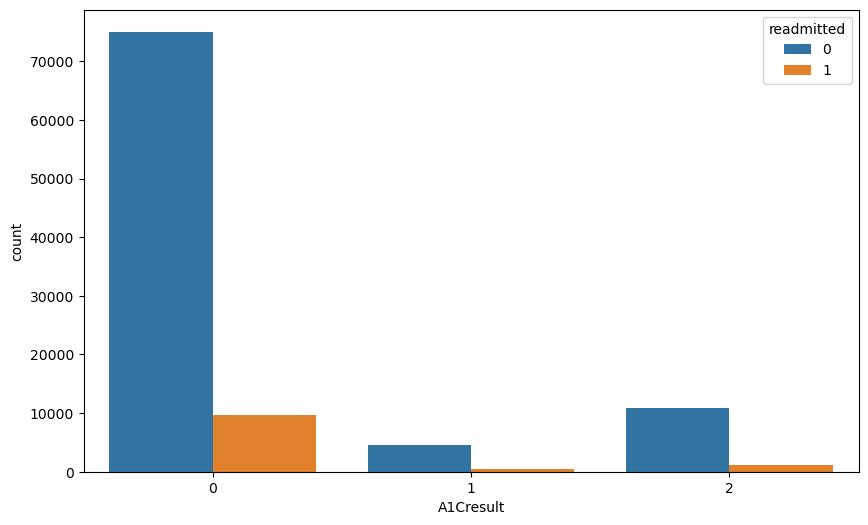

%-age belonging to class 1
0                   11.423683
2                    9.926837
1                    9.659319

In [945]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
plt.show()
category_ratio('A1Cresult')

In [946]:
feature_summary(df,'Null Count')

Data Type  Non-Null Count  Null Count  \
A1Cresult                    int64          101763           0   
max_glu_serum                int64          101763           0   
metformin-pioglitazone      object          101763           0   
metformin-rosiglitazone     object          101763           0   
miglitol                    object          101763           0   
nateglinide                 object          101763           0   
num_lab_procedures           int64          101763           0   
num_medications              int64          101763           0   
num_procedures               int64          101763           0   
number_diagnoses             int64          101763           0   
number_emergency             int64          101763           0   
number_inpatient             int64          101763           0   
number_outpatient            int64          101763           0   
pioglitazone                object          101763           0   
race                        object          101763           0   
readmitted                   int64          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
time_in_hospital             int64          101763           0   
tolazamide                  object          101763           0   
tolbutamide                 object          101763           0   
metformin                   object          101763           0   
insulin                     object          101763           0   
acarbose                    object          101763           0   
glyburide-metformin         object          101763           0   
acetohexamide               object          101763           0   
admission_source_id          int64          101763           0   
admission_type_id            int64          101763           0   
age                          int64          101763           0   
change                      object          101763           0   
chlorpropamide              object          101763           0   
citoglipton                 object          101763           0   
diabetesMed                 object          101763           0   
diag_1                      object          101763           0   
diag_2                      object          101763           0   
diag_3                      object          101763           0   
discharge_disposition_id     int64          101763           0   
examide                     object          101763           0   
gender                      object          101763           0   
glimepiride                 object          101763           0   
glimepiride-pioglitazone    object          101763           0   
glipizide                   object          101763           0   
glipizide-metformin         object          101763           0   
glyburide                   object          101763           0   
troglitazone                object          101763           0   

                          Null Percentage  Unique Count  Min    Max  
A1Cresult                             0.0             3  0.0    2.0  
max_glu_serum                         0.0             3  0.0    2.0  
metformin-pioglitazone                0.0             2  NaN    NaN  
metformin-rosiglitazone               0.0             2  NaN    NaN  
miglitol                              0.0             4  NaN    NaN  
nateglinide                           0.0             4  NaN    NaN  
num_lab_procedures                    0.0           118  1.0  132.0  
num_medications                       0.0            75  1.0   81.0  
num_procedures                        0.0             7  0.0    6.0  
number_diagnoses                      0.0            16  1.0   16.0  
number_emergency                      0.0            33  0.0   76.0  
number_inpatient                      0.0            21  0.0   21.0  
number_outpatient                     0.0            39  0.0   42.0  
pioglita

In [947]:
feature_summary(df,'Data Type')

Data Type  Non-Null Count  Null Count  \
insulin                     object          101763           0   
miglitol                    object          101763           0   
glyburide                   object          101763           0   
glyburide-metformin         object          101763           0   
acarbose                    object          101763           0   
metformin                   object          101763           0   
metformin-pioglitazone      object          101763           0   
metformin-rosiglitazone     object          101763           0   
nateglinide                 object          101763           0   
glipizide                   object          101763           0   
pioglitazone                object          101763           0   
race                        object          101763           0   
repaglinide                 object          101763           0   
rosiglitazone               object          101763           0   
tolazamide                  object          101763           0   
tolbutamide                 object          101763           0   
glipizide-metformin         object          101763           0   
troglitazone                object          101763           0   
glimepiride-pioglitazone    object          101763           0   
diag_2                      object          101763           0   
glimepiride                 object          101763           0   
citoglipton                 object          101763           0   
diabetesMed                 object          101763           0   
chlorpropamide              object          101763           0   
diag_1                      object          101763           0   
diag_3                      object          101763           0   
acetohexamide               object          101763           0   
examide                     object          101763           0   
gender                      object          101763           0   
change                      object          101763           0   
admission_source_id          int64          101763           0   
time_in_hospital             int64          101763           0   
admission_type_id            int64          101763           0   
age                          int64          101763           0   
readmitted                   int64          101763           0   
num_procedures               int64          101763           0   
number_outpatient            int64          101763           0   
number_inpatient             int64          101763           0   
number_emergency             int64          101763           0   
number_diagnoses             int64          101763           0   
num_medications              int64          101763           0   
num_lab_procedures           int64          101763           0   
max_glu_serum                int64          101763           0   
discharge_disposition_id     int64          101763           0   
A1Cresult                    int64          101763           0   

                          Null Percentage  Unique Count  Min    Max  
insulin                               0.0             4  NaN    NaN  
miglitol                              0.0             4  NaN    NaN  
glyburide                             0.0             4  NaN    NaN  
glyburide-metformin                   0.0             4  NaN    NaN  
acarbose                              0.0             4  NaN    NaN  
metformin                             0.0             4  NaN    NaN  
metformin-pioglitazone                0.0             2  NaN    NaN  
metformin-rosiglitazone               0.0             2  NaN    NaN  
nateglinide                           0.0             4  NaN    NaN  
glipizide                             0.0             4  NaN    NaN  
pioglitazone                          0.0             4  NaN    NaN  
race                                  0.0             3  NaN    NaN  
repaglinide                           0.0             4  NaN    NaN  
rosiglit

In [948]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## admission_type_id

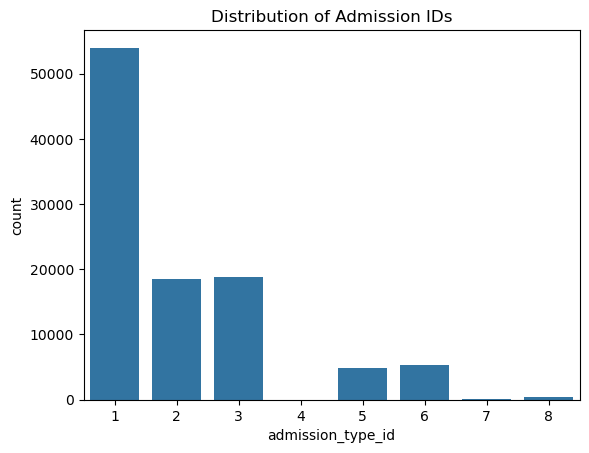

Total observations  %age of total data
1               53988           53.052681
3               18868           18.541120
2               18480           18.159842
6                5291            5.199336
5                4785            4.702102
8                 320            0.314456
7                  21            0.020636
4                  10            0.009827

In [949]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

val_counts(df,"admission_type_id")

In [950]:
df_ids.head(10)

admission_type_id    description
0                         1      Emergency
1                         2         Urgent
2                         3       Elective
3                         4        Newborn
4                         5  Not Available
5                         6            NaN
6                         7  Trauma Center
7                         8     Not Mapped
8                       NaN            NaN
9  discharge_disposition_id    description

Map 1&2 to Emergency, 3 - Elective, 4 - Newborn, 5,6,8 to Other and 7 to Trauma

In [951]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:"Other",
          6.0:"Other",
          7.0:"Trauma Center",
          8.0:"Other"}

df.admission_type_id = df.admission_type_id.replace(mapped)

In [952]:
df.admission_type_id.value_counts(dropna=False)

admission_type_id
Emergency        72468
Elective         18868
Other            10396
Trauma Center       21
New Born            10
Name: count, dtype: int64

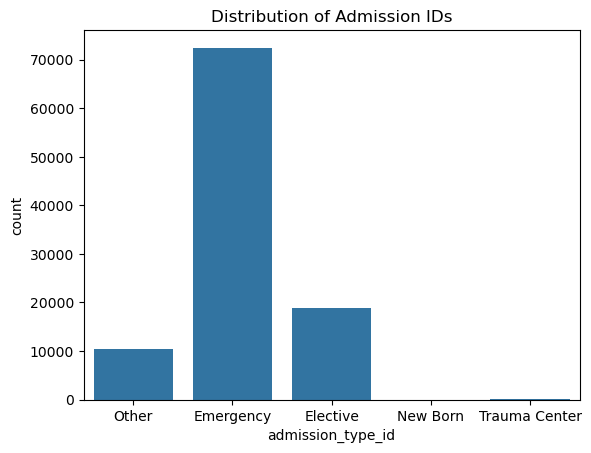

Total observations  %age of total data
Emergency                   72468           71.212523
Elective                    18868           18.541120
Other                       10396           10.215894
Trauma Center                  21            0.020636
New Born                       10            0.009827

In [953]:
sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

val_counts(df,"admission_type_id")

In [954]:
df.admission_type_id.value_counts(dropna=False)

admission_type_id
Emergency        72468
Elective         18868
Other            10396
Trauma Center       21
New Born            10
Name: count, dtype: int64

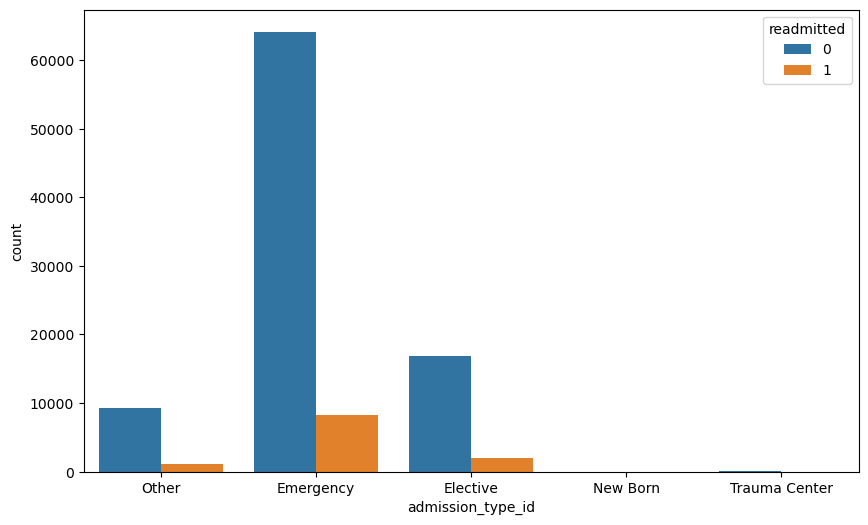

%-age belonging to class 1
Emergency                       11.435392
Other                           10.657945
Elective                        10.393258
New Born                        10.000000
Trauma Center                    0.000000

In [955]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df)
plt.show()
category_ratio('admission_type_id')

## discharge_disposition_id

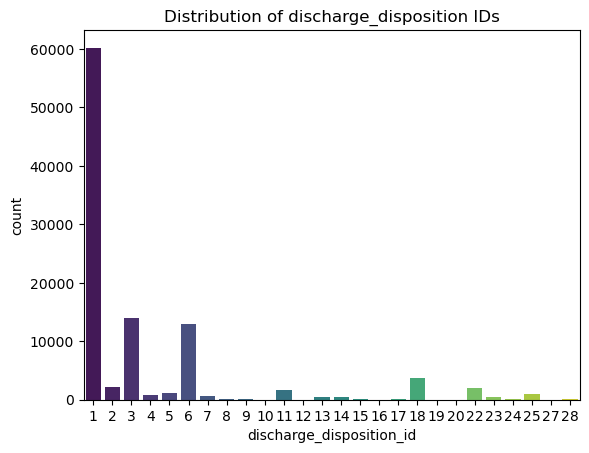

Distribution of ID's


Total observations  %age of total data
1                60232           59.188507
3                13954           13.712253
6                12902           12.678478
18                3691            3.627055
2                 2128            2.091133
22                1992            1.957489
11                1642            1.613553
5                 1184            1.163488
25                 989            0.971866
4                  815            0.800880
7                  623            0.612207
23                 412            0.404862
13                 399            0.392087
14                 372            0.365555
28                 139            0.136592
8                  108            0.106129
15                  63            0.061909
24                  48            0.047168
9                   21            0.020636
17                  14            0.013757
16                  11            0.010809
19                   8            0.007861
10                   6            0.005896
27                   5            0.004913
12                   3            0.002948
20                   2            0.001965

In [956]:
sns.countplot(x = "discharge_disposition_id", data = df, palette='viridis')
plt.title("Distribution of discharge_disposition IDs")
plt.show()

print("Distribution of ID's")
val_counts(df,"discharge_disposition_id")

In [957]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [958]:
df_ids.iloc[9:40]

admission_type_id  \
9   discharge_disposition_id   
10                         1   
11                         2   
12                         3   
13                         4   
14                         5   
15                         6   
16                         7   
17                         8   
18                         9   
19                        10   
20                        11   
21                        12   
22                        13   
23                        14   
24                        15   
25                        16   
26                        17   
27                        18   
28                        19   
29                        20   
30                        21   
31                        22   
32                        23   
33                        24   
34                        25   
35                        26   
36                        30   
37                        27   
38                        28   
39                        29   

                                          description  
9                                         description  
10                                 Discharged to home  
11  Discharged/transferred to another short term h...  
12                      Discharged/transferred to SNF  
13                      Discharged/transferred to ICF  
14  Discharged/transferred to another type of inpa...  
15  Discharged/transferred to home with home healt...  
16                                           Left AMA  
17  Discharged/transferred to home under care of H...  
18          Admitted as an inpatient to this hospital  
19  Neonate discharged to another hospital for neo...  
20                                            Expired  
21  Still patient or expected to return for outpat...  
22                                     Hospice / home  
23                         Hospice / medical facility  
24  Discharged/transferred within this institution...  
25  Discharged/transferred/referred another instit...  
26  Discharged/transferred/referred to this instit...  
27                                                NaN  
28           Expired at home. Medicaid only, hospice.  
29  Expired in a medical facility. Medicaid only, ...  
30    Expired, place unknown. Medicaid only, hospice.  
31  Discharged/transferred to another rehab fac in...  
32  Discharged/transferred to a long term care hos...  
33  Discharged/transferred to a nursing facility c...  
34                                         Not Mapped  
35                                    Unknown/Invalid  
36  Discharged/transferred to another Type of Heal...  
37  Discharged/transferred to a federal health car...  
38  Discharged/transferred/referred to a psychiatr...  
39  Discharged/transferred to a Critical Access Ho...

In [959]:
#11, 19, 20 and 21 are expired.
disp_index = df[df['discharge_disposition_id'].isin([11, 19, 20, 21])].index
len(disp_index)
df = df.drop(disp_index, axis=0)

In [960]:
mapped_d = {1:'Discharged to home', 6:'Discharged to home', 8:'Discharged to home',13:'Discharged to home', 19:'Discharged to home',
            18:'Discharged to Other',25:'Discharged to Other', 26:'Discharged to Other',
            2:'Discharged to Other', 3:'Discharged to Other', 4:'Discharged to Other',5:'Discharged to Other',7:'Discharged to Other',
            9:'Discharged to Other', 10:'Discharged to Other', 14:'Discharged to Other',16:'Discharged to Other',22:'Discharged to Other',
            23:'Discharged to Other', 24:'Discharged to Other', 27:'Discharged to Other', 28:'Discharged to Other', 29:'Discharged to Other',
            30:'Discharged to Other',
            12:'Expected back', 15:'Expected back', 17:'Expected back'}

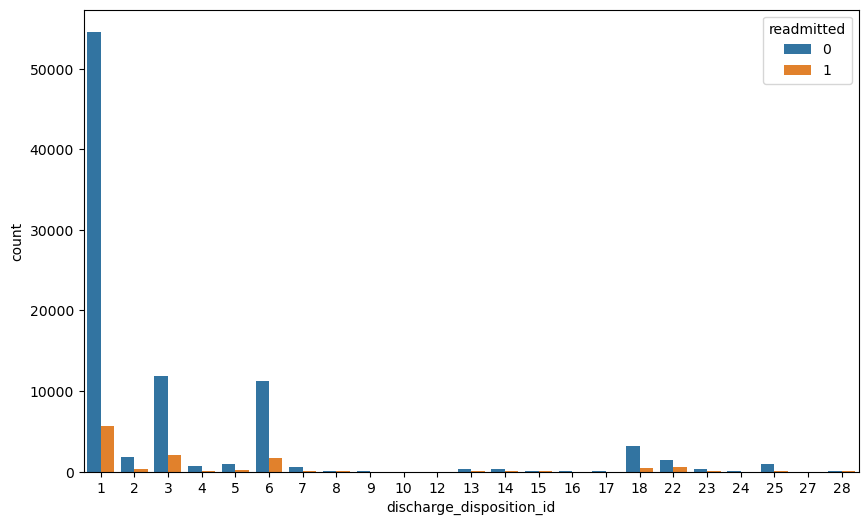

%-age belonging to class 1
12                   66.666667
15                   44.444444
9                    42.857143
28                   36.690647
22                   27.710843
5                    20.861486
2                    16.071429
3                    14.662462
24                   14.583333
7                    14.446228
8                    13.888889
4                    12.760736
6                    12.695706
18                   12.435654
25                    9.302326
1                     9.300704
23                    7.281553
14                    6.451613
13                    4.761905
17                    0.000000
16                    0.000000
10                    0.000000
27                    0.000000

In [961]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df)
plt.show()
category_ratio('discharge_disposition_id')

In [962]:


df.discharge_disposition_id = df.discharge_disposition_id.replace(mapped_d)

In [963]:
df['discharge_disposition_id'].unique()

array(['Discharged to Other', 'Discharged to home', 'Expected back'],
      dtype=object)

In [964]:
df.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
Discharged to home     73641
Discharged to Other    26390
Expected back             80
Name: count, dtype: int64

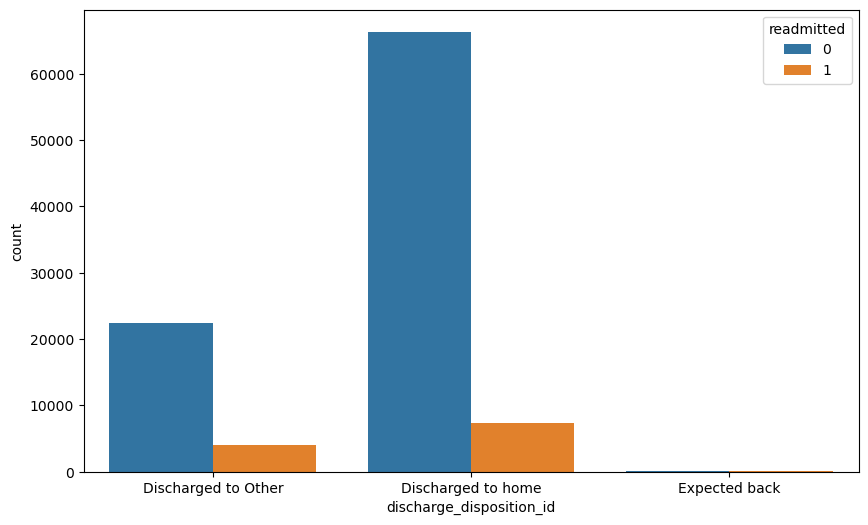

%-age belonging to class 1
Expected back                          37.50000
Discharged to Other                    15.35809
Discharged to home                      9.87765

In [965]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df)
plt.show()
category_ratio('discharge_disposition_id')

In [966]:
val_counts(df,'discharge_disposition_id')

Total observations  %age of total data
Discharged to home                73641           73.559349
Discharged to Other               26390           26.360740
Expected back                        80            0.079911

## admission_source_id

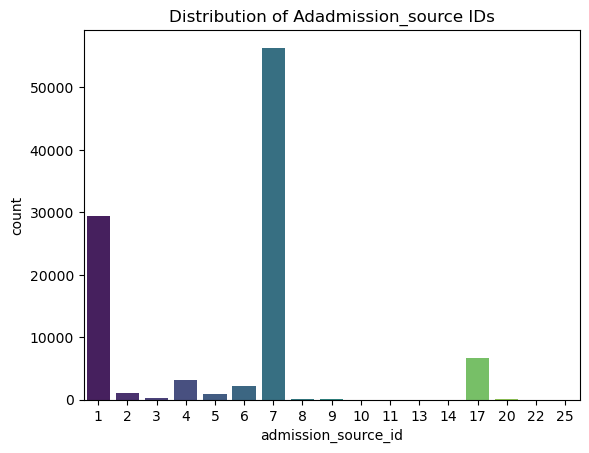

Distribution of ID's


Total observations  %age of total data
7                56361           56.298509
1                29321           29.288490
17                6645            6.637632
4                 3132            3.128527
6                 2244            2.241512
2                 1083            1.081799
5                  814            0.813097
3                  185            0.184795
20                 159            0.158824
9                  125            0.124861
8                   15            0.014983
22                  12            0.011987
10                   8            0.007991
14                   2            0.001998
11                   2            0.001998
25                   2            0.001998
13                   1            0.000999

In [967]:
sns.countplot(x = "admission_source_id", data = df, palette='viridis')
plt.title("Distribution of Adadmission_source IDs")
plt.show()

print("Distribution of ID's")
val_counts(df,'admission_source_id')

In [968]:
df_ids.iloc[41:]

admission_type_id                                        description
41  admission_source_id                                        description
42                    1                                 Physician Referral
43                    2                                    Clinic Referral
44                    3                                       HMO Referral
45                    4                           Transfer from a hospital
46                    5     Transfer from a Skilled Nursing Facility (SNF)
47                    6         Transfer from another health care facility
48                    7                                     Emergency Room
49                    8                              Court/Law Enforcement
50                    9                                      Not Available
51                   10              Transfer from critial access hospital
52                   11                                    Normal Delivery
53                   12                                 Premature Delivery
54                   13                                          Sick Baby
55                   14                                   Extramural Birth
56                   15                                      Not Available
57                   17                                                NaN
58                   18           Transfer From Another Home Health Agency
59                   19             Readmission to Same Home Health Agency
60                   20                                         Not Mapped
61                   21                                    Unknown/Invalid
62                   22   Transfer from hospital inpt/same fac reslt in...
63                   23                          Born inside this hospital
64                   24                         Born outside this hospital
65                   25            Transfer from Ambulatory Surgery Center
66                   26                              Transfer from Hospice

In [969]:
mapped_a = {1:'Referral', 2:'Referral', 3:'Referral',
            4:'Transfer', 5:'Transfer', 6:'Transfer',10:'Transfer', 18:'Transfer', 22:'Transfer', 25:'Transfer', 26:'Transfer',24:'Transfer',
            9:'Other', 15:'Other', 17:'Other', 20:'Other',21:'Other',
            7:'Emergency',
            8:'Other', 11:'Other',12:'Other', 13:'Other', 14:'Other', 19:'Other', 23:'Other'
}

In [970]:
df.admission_source_id = df.admission_source_id.replace(mapped_a)

In [971]:
df.admission_source_id.value_counts(dropna=False)

admission_source_id
Emergency    56361
Referral     30589
Other         6949
Transfer      6212
Name: count, dtype: int64

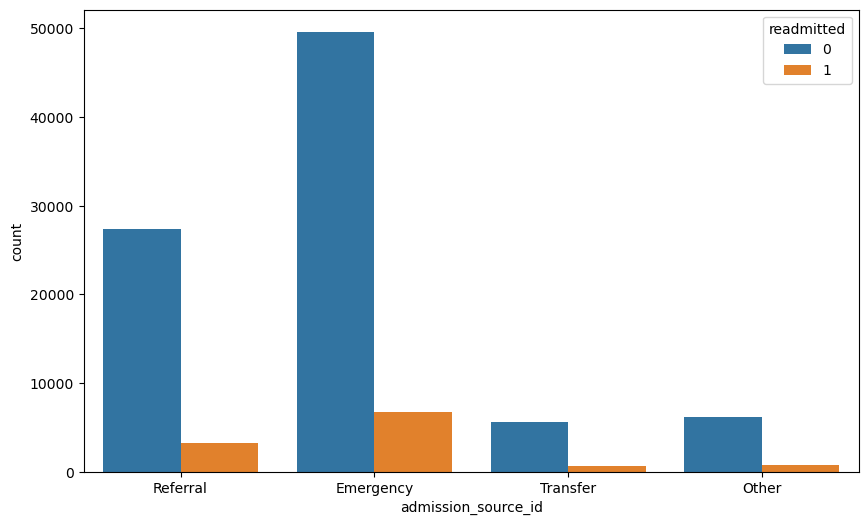

%-age belonging to class 1
Emergency                   11.923138
Other                       10.692186
Referral                    10.690117
Transfer                    10.045074

In [972]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='admission_source_id', hue='readmitted', data=df)
plt.show()
category_ratio('admission_source_id')

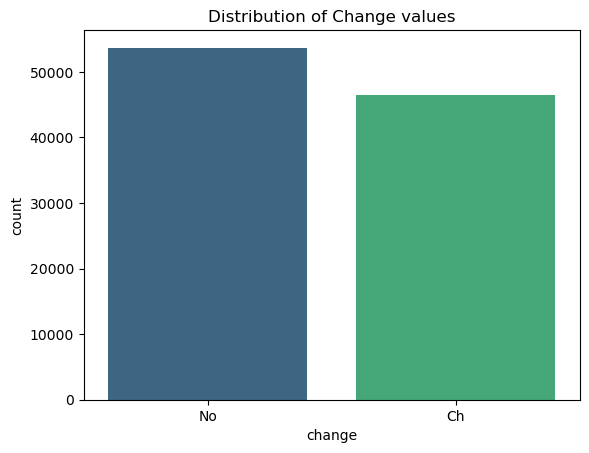

Distribution of change


Total observations  %age of total data
No               53670           53.610492
Ch               46441           46.389508

In [973]:
sns.countplot(x = "change", data = df, palette='viridis')
plt.title("Distribution of Change values")
plt.show()

print("Distribution of change")
val_counts(df,"change")

In [974]:
df.change = df.change.replace("Ch","Yes")

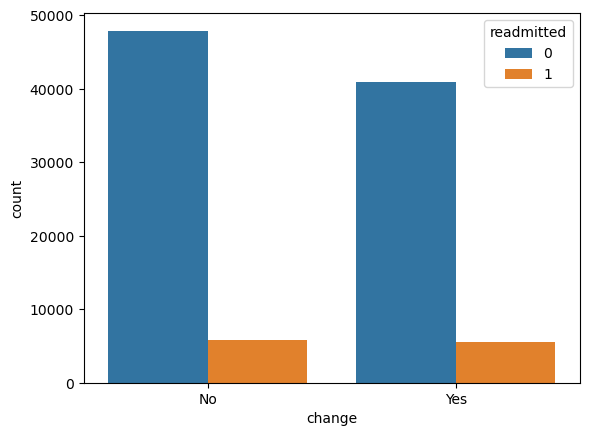

%-age belonging to class 1
Yes                   11.967873
No                    10.804919

In [975]:
sns.countplot(x = "change", hue = "readmitted", data = df)
plt.show()
category_ratio('change')

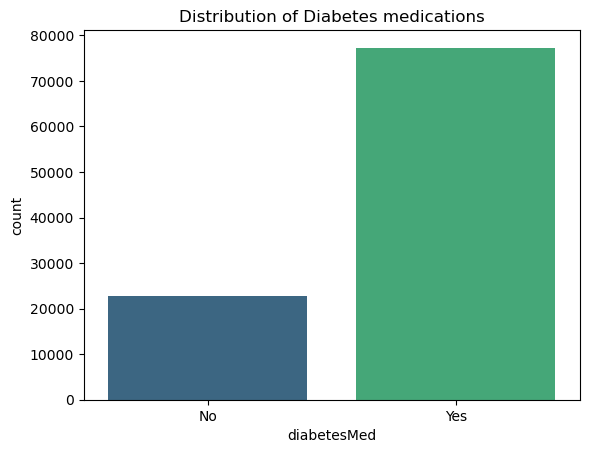

Distribution of change


Total observations  %age of total data
Yes               77270           77.184325
No                22841           22.815675

In [976]:
sns.countplot(x = "diabetesMed", data = df, palette='viridis')
plt.title("Distribution of Diabetes medications")
plt.show()

print("Distribution of change")
val_counts(df,"diabetesMed")

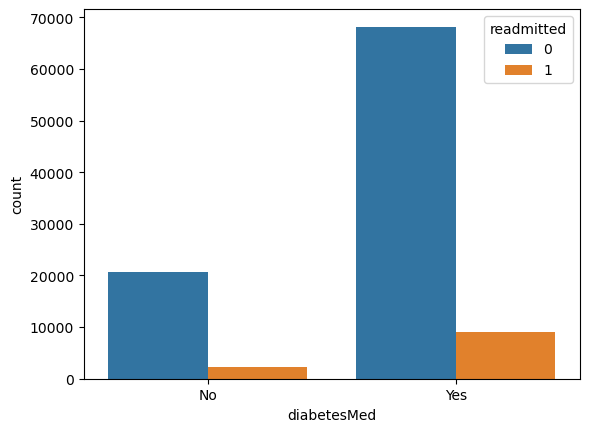

%-age belonging to class 1
Yes                   11.791122
No                     9.833195

In [977]:
sns.countplot(x = "diabetesMed", hue = "readmitted", data = df)
plt.show()
category_ratio('diabetesMed')

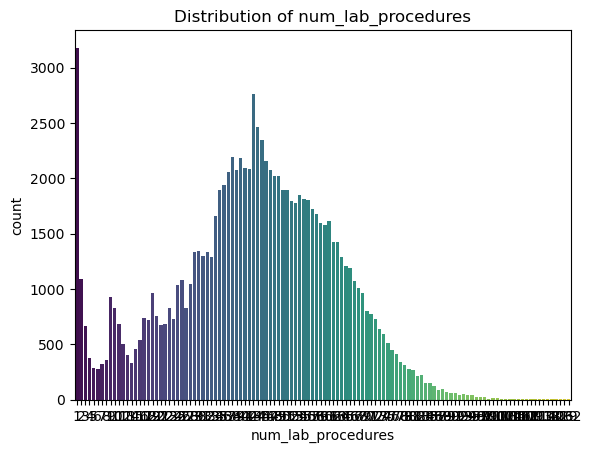

Total observations  %age of total data
1                  3180            3.176474
43                 2765            2.761934
44                 2467            2.464265
45                 2347            2.344398
38                 2190            2.187572
..                  ...                 ...
120                   1            0.000999
132                   1            0.000999
121                   1            0.000999
126                   1            0.000999
118                   1            0.000999

[118 rows x 2 columns]

In [978]:
sns.countplot(x = 'num_lab_procedures', data = df,palette='viridis')
plt.title('Distribution of num_lab_procedures')
plt.show()

val_counts(df,'num_lab_procedures')

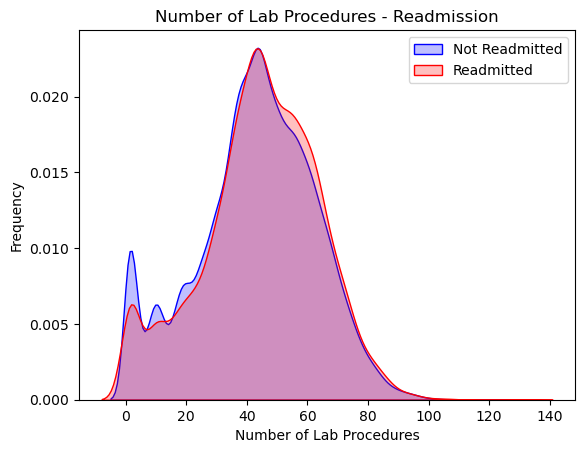

In [979]:
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

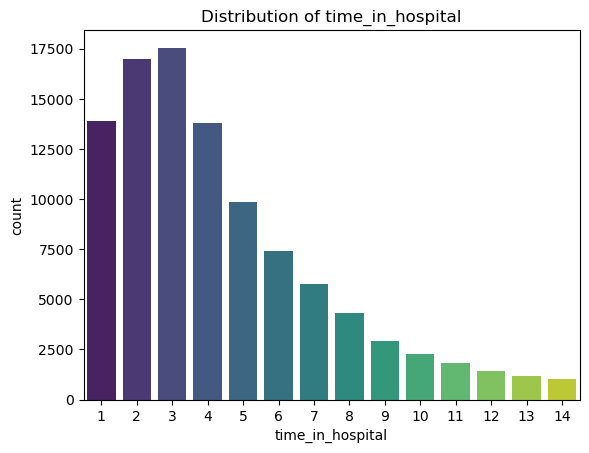

Total observations  %age of total data
3                17546           17.526546
2                16976           16.957178
1                13876           13.860615
4                13775           13.759727
5                 9834            9.823096
6                 7425            7.416767
7                 5744            5.737631
8                 4322            4.317208
9                 2927            2.923755
10                2290            2.287461
11                1809            1.806994
12                1401            1.399447
13                1173            1.171699
14                1013            1.011877

In [980]:
sns.countplot(x = 'time_in_hospital', data = df,palette='viridis')
plt.title('Distribution of time_in_hospital')
plt.show()

val_counts(df,'time_in_hospital')

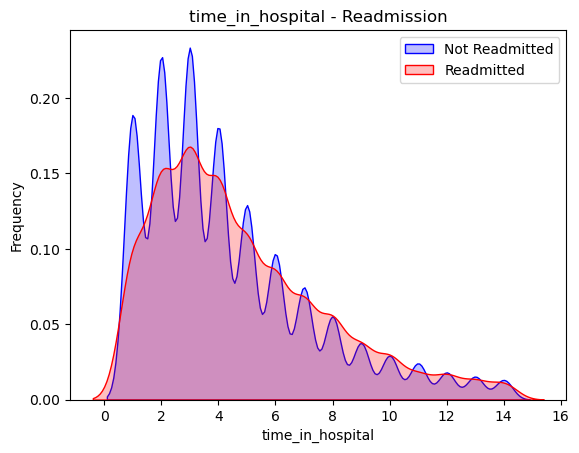

In [981]:
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True,label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("time_in_hospital")
ax.set_ylabel("Frequency")
ax.set_title("time_in_hospital - Readmission")

plt.show()

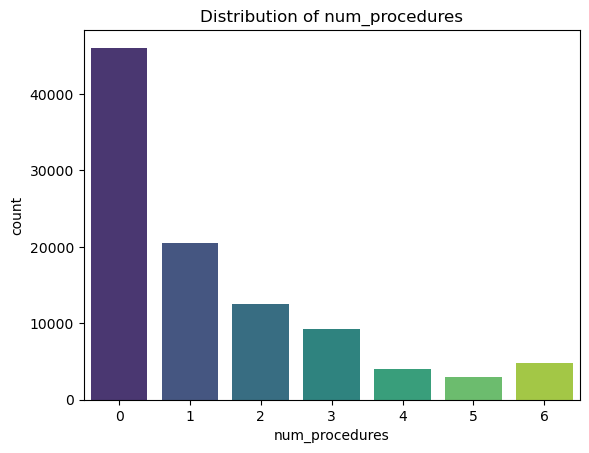

Total observations  %age of total data
0               46090           46.038897
1               20440           20.417337
2               12460           12.446185
3                9246            9.235748
6                4811            4.805666
4                4068            4.063490
5                2996            2.992678

In [982]:
sns.countplot(x = 'num_procedures', data = df,palette='viridis')
plt.title('Distribution of num_procedures')
plt.show()

val_counts(df,'num_procedures')

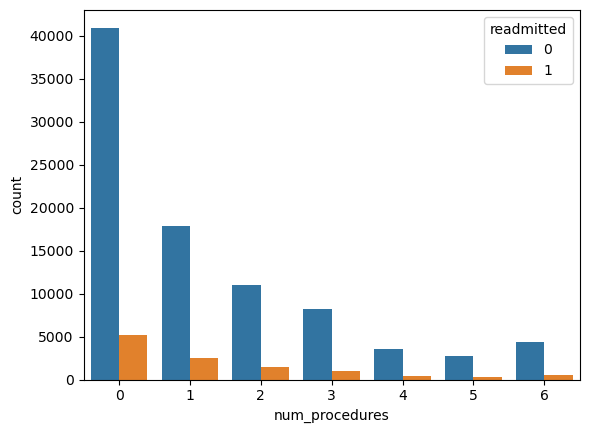

%-age belonging to class 1
1                   12.387476
2                   11.412520
4                   11.332350
0                   11.212844
3                   10.912827
6                    9.873207
5                    9.679573

In [983]:
sns.countplot(x = "num_procedures", hue = "readmitted", data = df)
plt.show()
category_ratio('num_procedures')

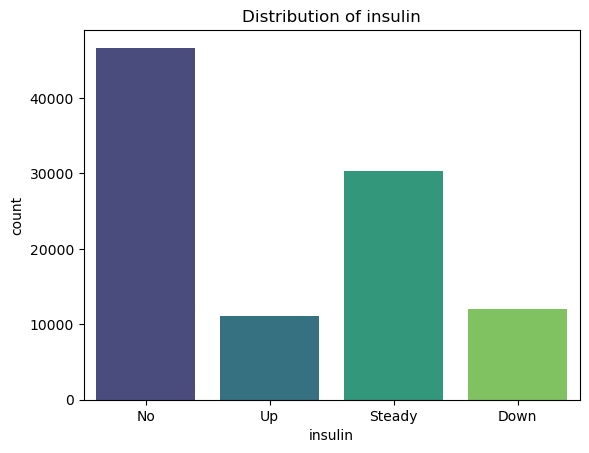

Total observations  %age of total data
No                   46677           46.625246
Steady               30331           30.297370
Down                 12012           11.998681
Up                   11091           11.078703

In [984]:
sns.countplot(x = 'insulin', data = df,palette='viridis')
plt.title('Distribution of insulin')
plt.show()

val_counts(df,'insulin')

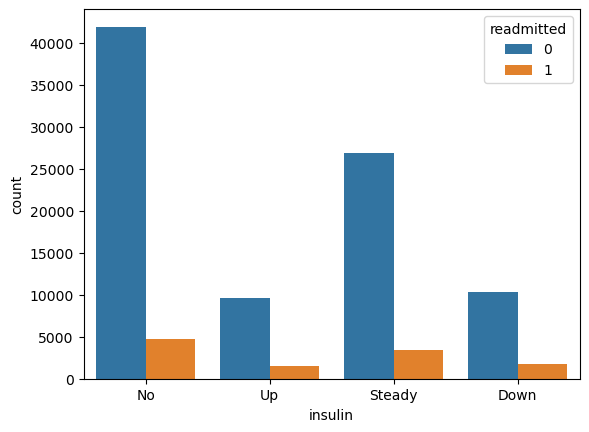

%-age belonging to class 1
Down                     14.135864
Up                       13.253990
Steady                   11.318453
No                       10.189172

In [985]:
sns.countplot(x = "insulin", hue = "readmitted", data = df)
plt.show()
category_ratio('insulin')

## Number of Medications
### Number of distinct generic names administered during the encounter

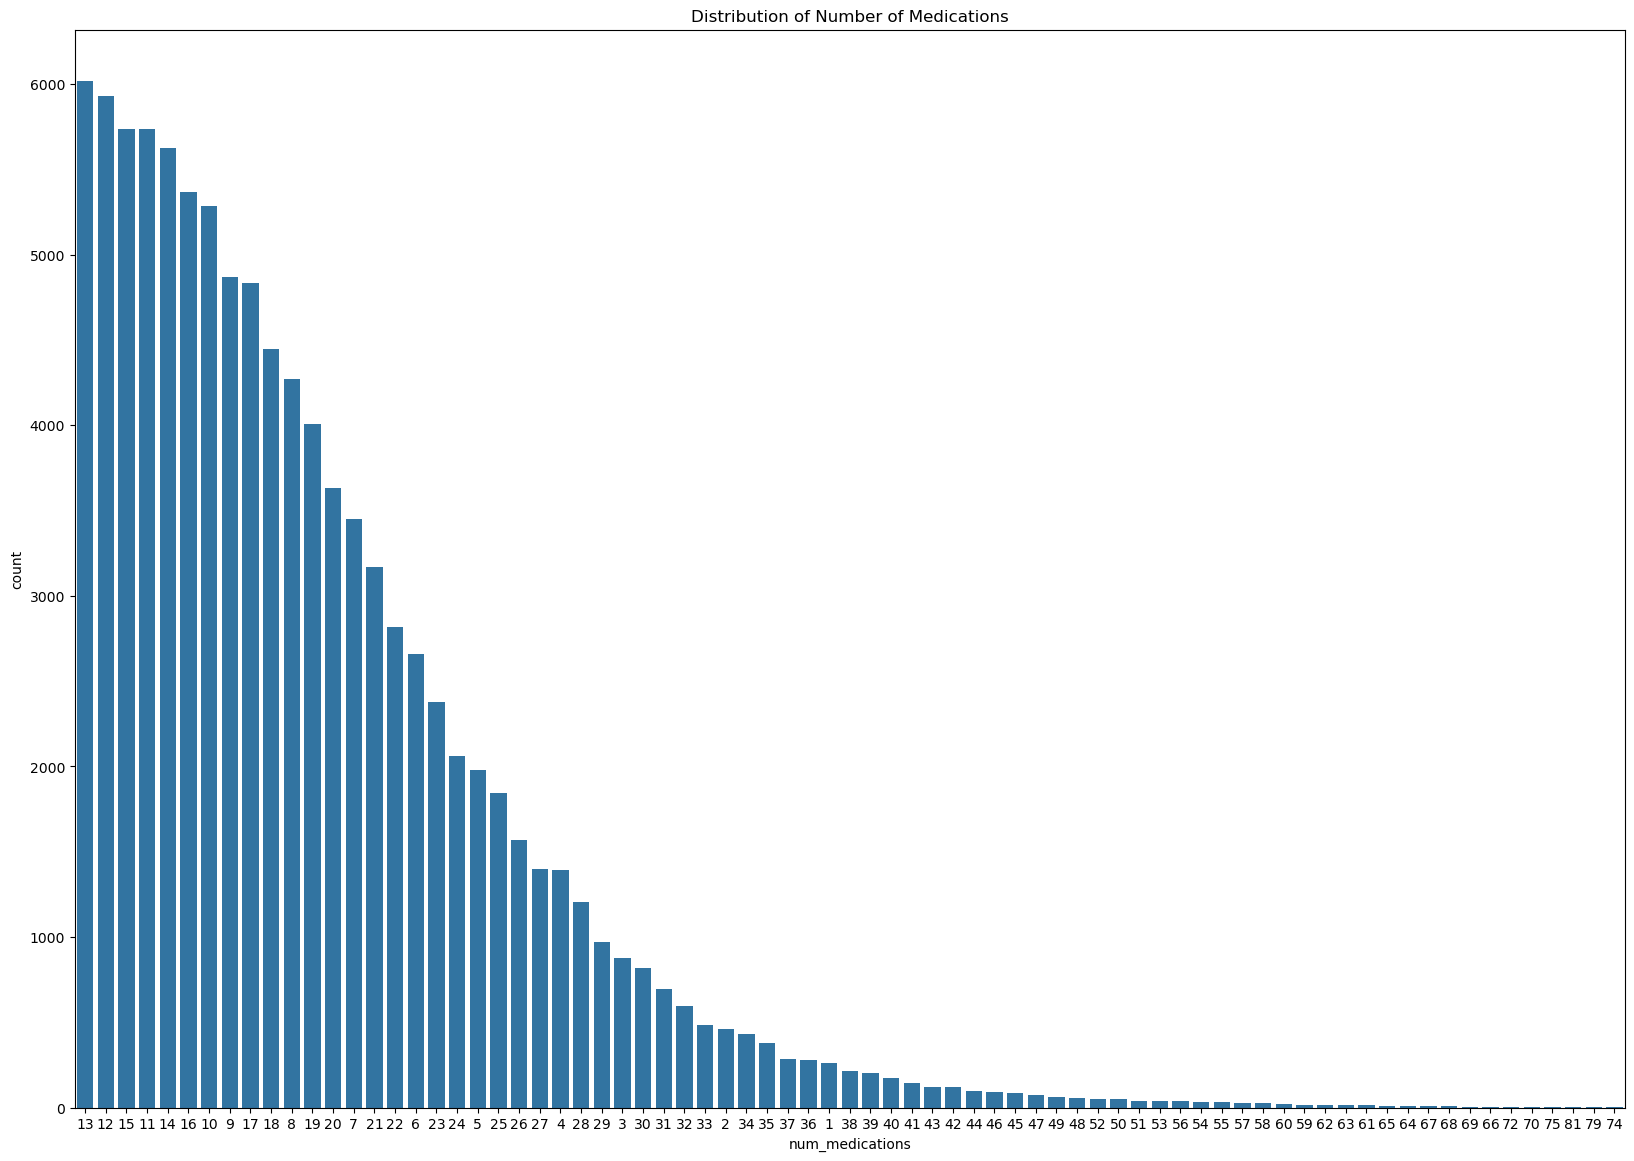

Total observations  %age of total data
13                6018            6.011327
12                5932            5.925423
15                5739            5.732637
11                5736            5.729640
14                5627            5.620761
..                 ...                 ...
70                   2            0.001998
75                   2            0.001998
81                   1            0.000999
79                   1            0.000999
74                   1            0.000999

[75 rows x 2 columns]

In [986]:
plt.figure(figsize=(20,14))
sns.countplot(x="num_medications", data = df, order = df.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

val_counts(df,"num_medications")

In [987]:
feature_summary(df,'Unique Count')

Data Type  Non-Null Count  Null Count  \
num_lab_procedures           int64          100111           0   
num_medications              int64          100111           0   
number_outpatient            int64          100111           0   
number_emergency             int64          100111           0   
number_inpatient             int64          100111           0   
number_diagnoses             int64          100111           0   
time_in_hospital             int64          100111           0   
age                          int64          100111           0   
diag_1                      object          100111           0   
diag_2                      object          100111           0   
diag_3                      object          100111           0   
num_procedures               int64          100111           0   
admission_type_id           object          100111           0   
glyburide-metformin         object          100111           0   
insulin                     object          100111           0   
acarbose                    object          100111           0   
metformin                   object          100111           0   
miglitol                    object          100111           0   
glyburide                   object          100111           0   
pioglitazone                object          100111           0   
glipizide                   object          100111           0   
glimepiride                 object          100111           0   
repaglinide                 object          100111           0   
rosiglitazone               object          100111           0   
chlorpropamide              object          100111           0   
admission_source_id         object          100111           0   
nateglinide                 object          100111           0   
race                        object          100111           0   
tolazamide                  object          100111           0   
A1Cresult                    int64          100111           0   
max_glu_serum                int64          100111           0   
discharge_disposition_id    object          100111           0   
metformin-rosiglitazone     object          100111           0   
metformin-pioglitazone      object          100111           0   
glipizide-metformin         object          100111           0   
glimepiride-pioglitazone    object          100111           0   
gender                      object          100111           0   
readmitted                   int64          100111           0   
diabetesMed                 object          100111           0   
change                      object          100111           0   
acetohexamide               object          100111           0   
tolbutamide                 object          100111           0   
troglitazone                object          100111           0   
examide                     object          100111           0   
citoglipton                 object          100111           0   

                          Null Percentage  Unique Count  Min    Max  
num_lab_procedures                    0.0           118  1.0  132.0  
num_medications                       0.0            75  1.0   81.0  
number_outpatient                     0.0            39  0.0   42.0  
number_emergency                      0.0            33  0.0   76.0  
number_inpatient                      0.0            21  0.0   21.0  
number_diagnoses                      0.0            16  1.0   16.0  
time_in_hospital                      0.0            14  1.0   14.0  
age                                   0.0            10  5.0   95.0  
diag_1                                0.0             9  NaN    NaN  
diag_2                                0.0             9  NaN    NaN  
diag_3                                0.0             9  NaN    NaN  
num_procedures                        0.0             7  0.0    6.0  
admission_type_id                     0.0             5  NaN    NaN  
glyburid

## Diabetes medications
There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.
But firstly, lets look at the medications

In [988]:
# Only one value for theses medications
df=df.drop(['citoglipton','examide'], axis = 1)

In [989]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

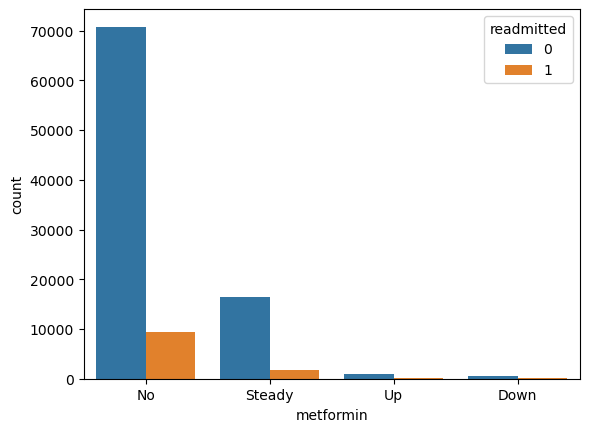

metformin
No        80214
Steady    18255
Up         1067
Down        575
Name: count, dtype: int64

        %-age belonging to class 1
Down                     12.000000
No                       11.741093
Steady                    9.761709
Up                        8.247423


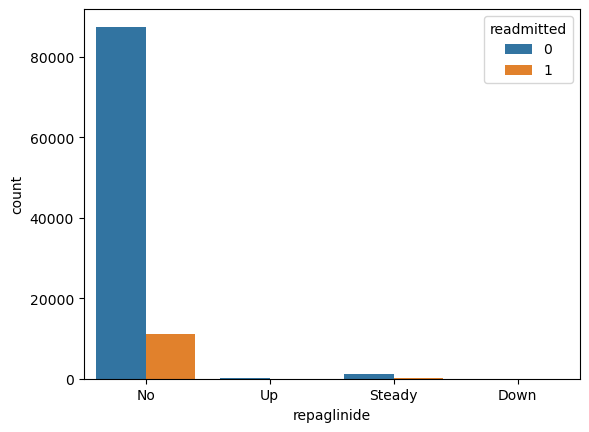

repaglinide
No        98584
Steady     1373
Up          109
Down         45
Name: count, dtype: int64

        %-age belonging to class 1
Up                       18.348624
Steady                   13.255645
No                       11.312180
Down                      6.666667


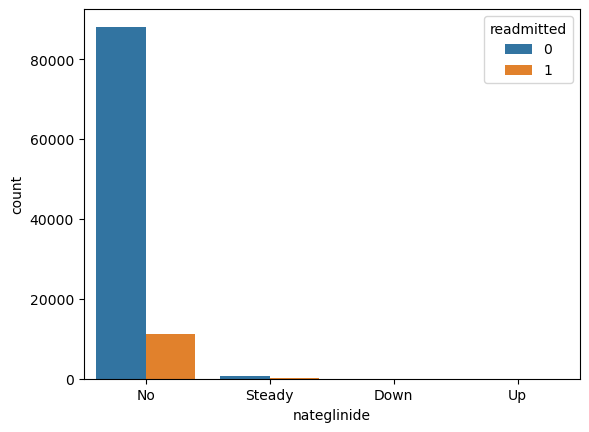

nateglinide
No        99416
Steady      660
Up           24
Down         11
Name: count, dtype: int64

        %-age belonging to class 1
Steady                   11.818182
No                       11.343245
Down                      9.090909
Up                        4.166667


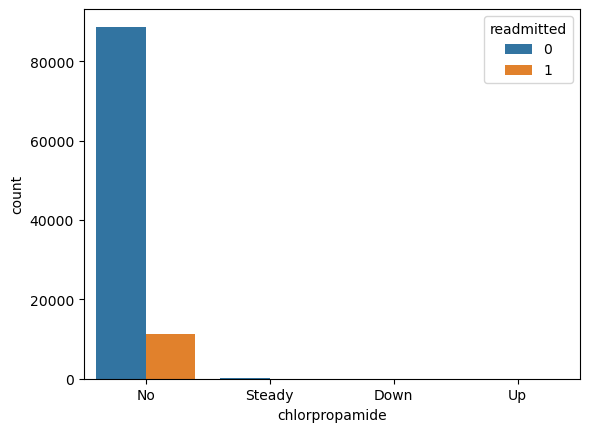

chlorpropamide
No        100026
Steady        78
Up             6
Down           1
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.349049
Steady                    6.410256
Down                      0.000000
Up                        0.000000


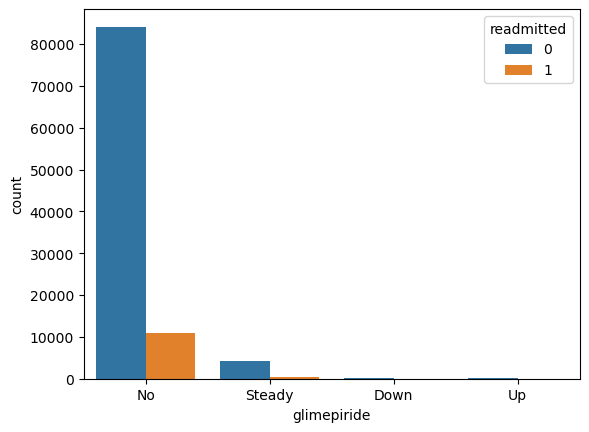

glimepiride
No        94964
Steady     4630
Up          324
Down        193
Name: count, dtype: int64

        %-age belonging to class 1
Down                     12.953368
Up                       11.419753
No                       11.401163
Steady                   10.107991


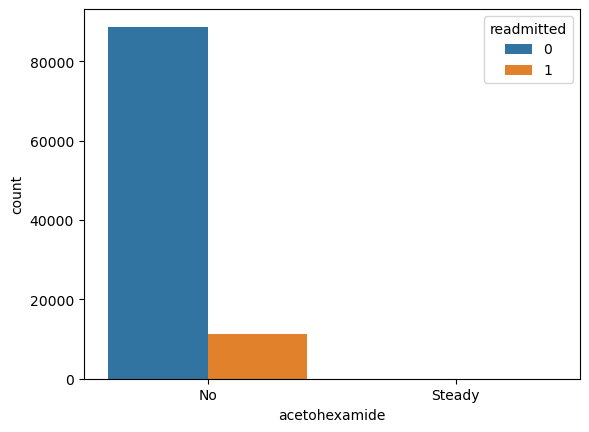

acetohexamide
No        100110
Steady         1
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.344521
Steady                    0.000000


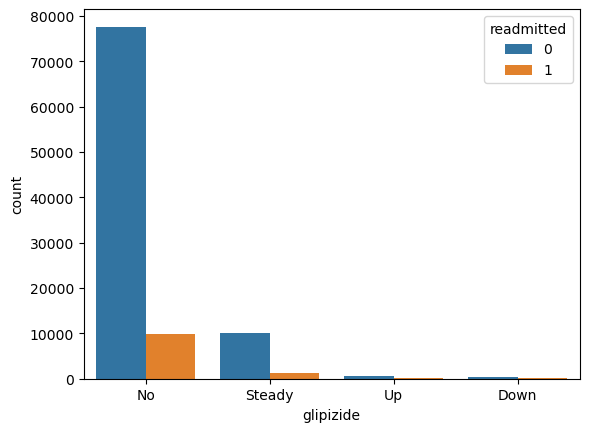

glipizide
No        87507
Steady    11283
Up          767
Down        554
Name: count, dtype: int64

        %-age belonging to class 1
Down                     15.342960
Up                       12.907432
No                       11.319094
Steady                   11.238146


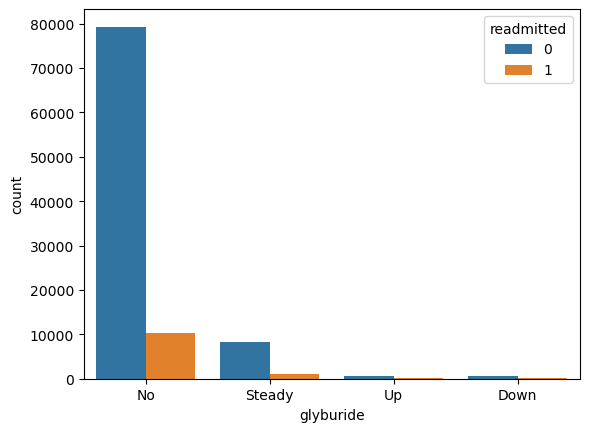

glyburide
No        89544
Steady     9200
Up          806
Down        561
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.418967
Steady                   10.815217
Up                       10.545906
Down                      9.269162


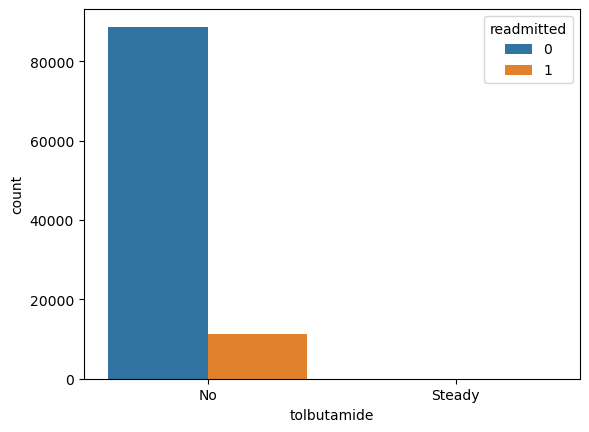

tolbutamide
No        100090
Steady        21
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.345789
Steady                    4.761905


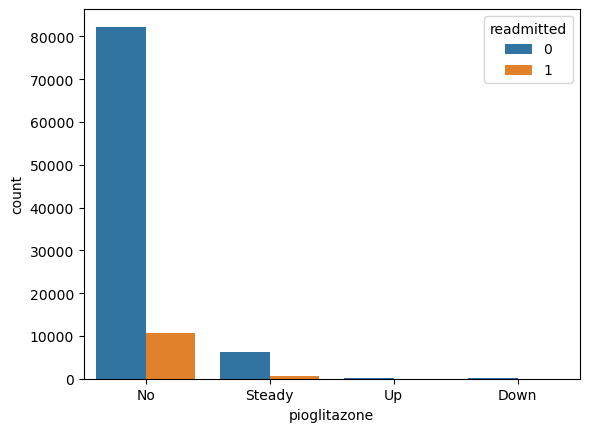

pioglitazone
No        92831
Steady     6933
Up          230
Down        117
Name: count, dtype: int64

        %-age belonging to class 1
Down                     15.384615
Up                       12.608696
No                       11.400287
Steady                   10.486081


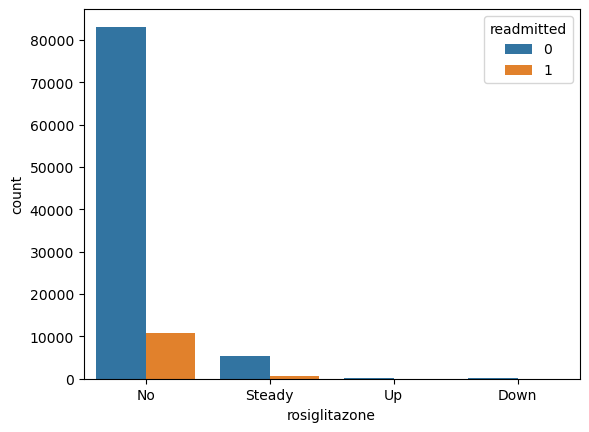

rosiglitazone
No        93783
Steady     6069
Up          173
Down         86
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.400787
Up                       10.982659
Steady                   10.561872
Down                      5.813953


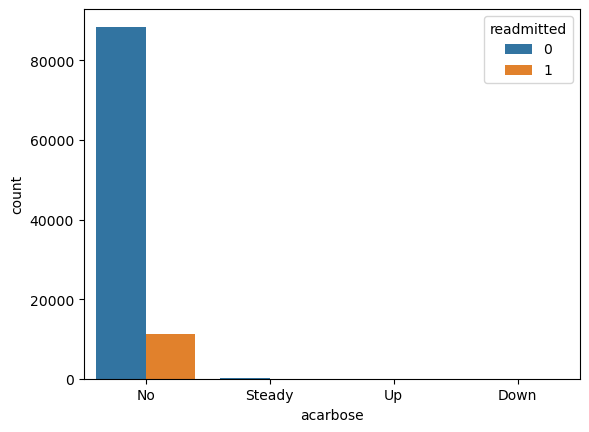

acarbose
No        99804
Steady      294
Up           10
Down          3
Name: count, dtype: int64

        %-age belonging to class 1
Down                     33.333333
Up                       20.000000
No                       11.351248
Steady                    8.503401


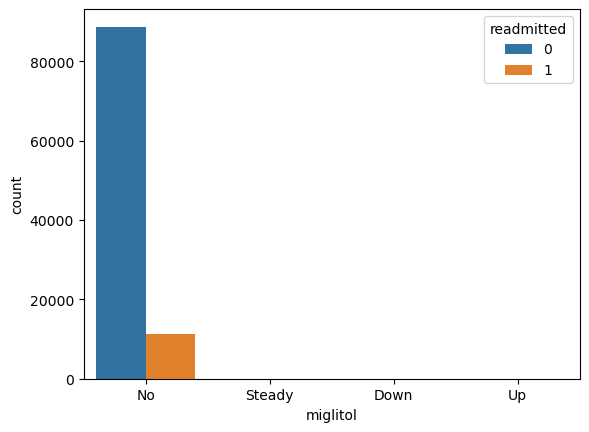

miglitol
No        100073
Steady        31
Down           5
Up             2
Name: count, dtype: int64

        %-age belonging to class 1
Down                     40.000000
No                       11.344718
Steady                    6.451613
Up                        0.000000


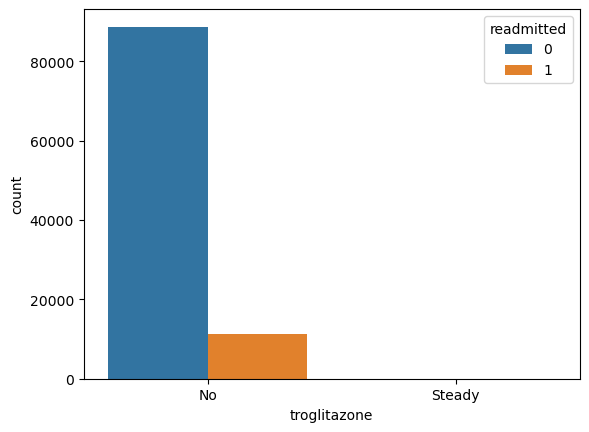

troglitazone
No        100108
Steady         3
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.344748
Steady                    0.000000


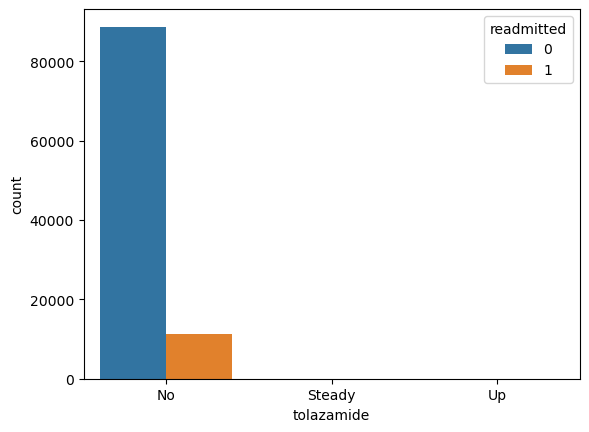

tolazamide
No        100072
Steady        38
Up             1
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.345831
Steady                    7.894737
Up                        0.000000


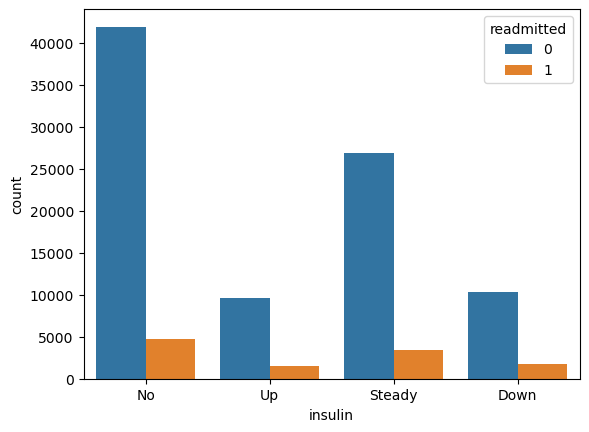

insulin
No        46677
Steady    30331
Down      12012
Up        11091
Name: count, dtype: int64

        %-age belonging to class 1
Down                     14.135864
Up                       13.253990
Steady                   11.318453
No                       10.189172


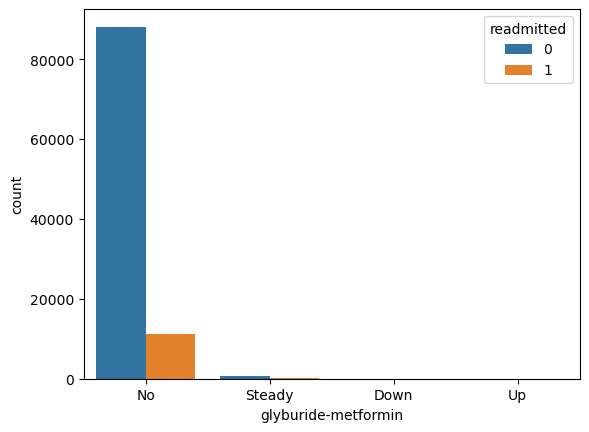

glyburide-metformin
No        99413
Steady      684
Up            8
Down          6
Name: count, dtype: int64

        %-age belonging to class 1
Down                     16.666667
No                       11.345599
Steady                   11.257310
Up                        0.000000


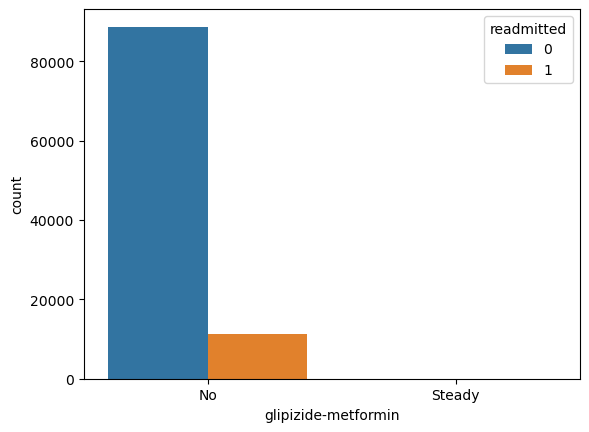

glipizide-metformin
No        100098
Steady        13
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.344882
Steady                    7.692308


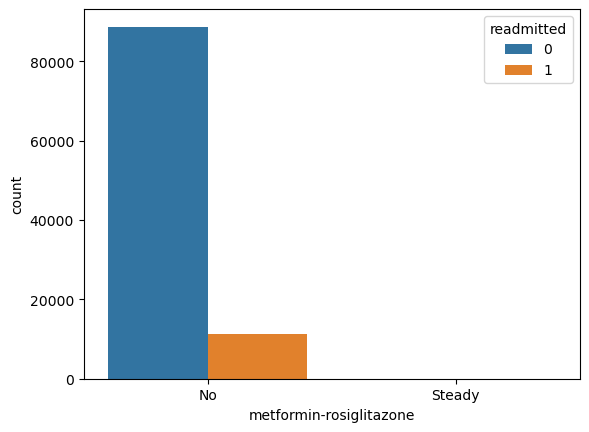

metformin-rosiglitazone
No        100109
Steady         2
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.344634
Steady                    0.000000


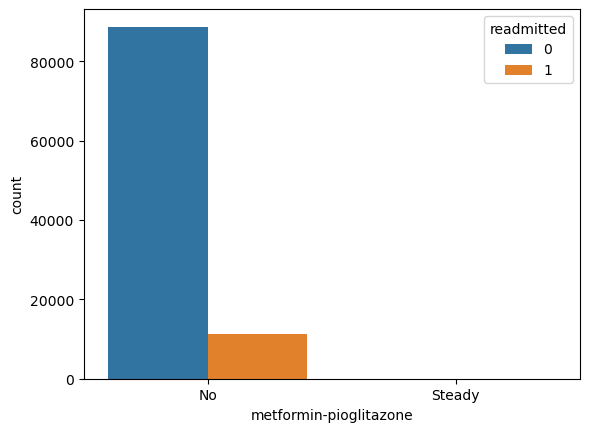

metformin-pioglitazone
No        100110
Steady         1
Name: count, dtype: int64

        %-age belonging to class 1
No                       11.344521
Steady                    0.000000


In [990]:
def plotdrug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, hue = "readmitted", data = df)
    plt.show()
    #print(drug.upper())
    print(df[f"{drug}"].value_counts())
    print()
    print(category_ratio(drug))
    

plotdrug(drugs)

In [991]:
feature_summary(df,'Data Type')

Data Type  Non-Null Count  Null Count  \
troglitazone                object          100111           0   
pioglitazone                object          100111           0   
repaglinide                 object          100111           0   
rosiglitazone               object          100111           0   
tolazamide                  object          100111           0   
nateglinide                 object          100111           0   
miglitol                    object          100111           0   
metformin-rosiglitazone     object          100111           0   
metformin-pioglitazone      object          100111           0   
metformin                   object          100111           0   
acarbose                    object          100111           0   
insulin                     object          100111           0   
glyburide-metformin         object          100111           0   
glyburide                   object          100111           0   
glipizide-metformin         object          100111           0   
glipizide                   object          100111           0   
glimepiride-pioglitazone    object          100111           0   
glimepiride                 object          100111           0   
acetohexamide               object          100111           0   
admission_source_id         object          100111           0   
admission_type_id           object          100111           0   
tolbutamide                 object          100111           0   
change                      object          100111           0   
chlorpropamide              object          100111           0   
diabetesMed                 object          100111           0   
diag_1                      object          100111           0   
diag_2                      object          100111           0   
diag_3                      object          100111           0   
discharge_disposition_id    object          100111           0   
gender                      object          100111           0   
race                        object          100111           0   
time_in_hospital             int64          100111           0   
readmitted                   int64          100111           0   
A1Cresult                    int64          100111           0   
number_outpatient            int64          100111           0   
number_inpatient             int64          100111           0   
number_emergency             int64          100111           0   
number_diagnoses             int64          100111           0   
num_procedures               int64          100111           0   
num_medications              int64          100111           0   
num_lab_procedures           int64          100111           0   
age                          int64          100111           0   
max_glu_serum                int64          100111           0   

                          Null Percentage  Unique Count  Min    Max  
troglitazone                          0.0             2  NaN    NaN  
pioglitazone                          0.0             4  NaN    NaN  
repaglinide                           0.0             4  NaN    NaN  
rosiglitazone                         0.0             4  NaN    NaN  
tolazamide                            0.0             3  NaN    NaN  
nateglinide                           0.0             4  NaN    NaN  
miglitol                              0.0             4  NaN    NaN  
metformin-rosiglitazone               0.0             2  NaN    NaN  
metformin-pioglitazone                0.0             2  NaN    NaN  
metformin                             0.0             4  NaN    NaN  
acarbose                              0.0             4  NaN    NaN  
insulin                               0.0             4  NaN    NaN  
glyburide-metformin                   0.0             4  NaN    NaN  
glyburide                             0.0             4  NaN    NaN  
glipizide-metformin                   0.0             2  NaN    NaN  


In [992]:
cat_data = df.select_dtypes('O')

num_data = df.select_dtypes(np.number)

cat_data

race  gender admission_type_id discharge_disposition_id  \
0             Caucasian  Female             Other      Discharged to Other   
1             Caucasian  Female         Emergency       Discharged to home   
2       AfricanAmerican  Female         Emergency       Discharged to home   
3             Caucasian    Male         Emergency       Discharged to home   
4             Caucasian    Male         Emergency       Discharged to home   
...                 ...     ...               ...                      ...   
101761  AfricanAmerican    Male         Emergency      Discharged to Other   
101762  AfricanAmerican  Female         Emergency      Discharged to Other   
101763        Caucasian    Male         Emergency       Discharged to home   
101764        Caucasian  Female         Emergency      Discharged to Other   
101765        Caucasian    Male         Emergency       Discharged to home   

       admission_source_id     diag_1         diag_2       diag_3 metformin  \
0                 Referral   Diabetes          Other        Other        No   
1                Emergency      Other       Diabetes        Other        No   
2                Emergency      Other       Diabetes        Other        No   
3                Emergency      Other       Diabetes  Circulatory        No   
4                Emergency  Neoplasms      Neoplasms     Diabetes        No   
...                    ...        ...            ...          ...       ...   
101761           Emergency   Diabetes          Other  Circulatory    Steady   
101762            Transfer  Digestive          Other    Digestive        No   
101763           Emergency      Other  Genitourinary        Other    Steady   
101764           Emergency     Injury          Other       Injury        No   
101765           Emergency  Digestive      Digestive    Digestive        No   

       repaglinide  ... troglitazone tolazamide insulin glyburide-metformin  \
0               No  ...           No         No      No                  No   
1               No  ...           No         No      Up                  No   
2               No  ...           No         No      No                  No   
3               No  ...           No         No      Up                  No   
4               No  ...           No         No  Steady                  No   
...            ...  ...          ...        ...     ...                 ...   
101761          No  ...           No         No    Down                  No   
101762          No  ...           No         No  Steady                  No   
101763          No  ...           No         No    Down                  No   
101764          No  ...           No         No      Up                  No   
101765          No  ...           No         No      No                  No   

       glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                       No                       No                      No   
1                       No                       No                      No   
2                       No                       No                      No   
3                       No                       No                      No   
4                       No                       No                      No   
...                    ...                      ...                     ...   
101761                  No                       No                      No   
101762                  No                       No                      No   
101763                  No                       No                      No   
101764                  No                       No                      No   
101765                  No                       No                      No   

       metformin-pioglitazone change diabetesMed  
0                          No     No          No  
1                          No    Yes         Yes  
2                          No     No         Yes  
3                          No  

In [993]:
num_data

age  time_in_hospital  num_lab_procedures  num_procedures  \
0         5                 1                  41               0   
1        15                 3                  59               0   
2        25                 2                  11               5   
3        35                 2                  44               1   
4        45                 1                  51               0   
...     ...               ...                 ...             ...   
101761   75                 3                  51               0   
101762   85                 5                  33               3   
101763   75                 1                  53               0   
101764   85                10                  45               2   
101765   75                 6                  13               3   

        num_medications  number_outpatient  number_emergency  \
0                     1                  0                 0   
1                    18                  0                 0   
2                    13                  2                 0   
3                    16                  0                 0   
4                     8                  0                 0   
...                 ...                ...               ...   
101761               16                  0                 0   
101762               18                  0                 0   
101763                9                  1                 0   
101764               21                  0                 0   
101765                3                  0                 0   

        number_inpatient  number_diagnoses  max_glu_serum  A1Cresult  \
0                      0                 1              0          0   
1                      0                 9              0          0   
2                      1                 6              0          0   
3                      0                 7              0          0   
4                      0                 5              0          0   
...                  ...               ...            ...        ...   
101761                 0                 9              0          2   
101762                 1                 9              0          0   
101763                 0                13              0          0   
101764                 1                 9              0          0   
101765                 0                 9              0          0   

        readmitted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
101761           0  
101762           0  
101763           0  
101764           0  
101765           0  

[100111 rows x 12 columns]

In [994]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [995]:
len(cat_cols)

31

In [996]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                                         'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                                         'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
                                         'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 
                                         'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                                         'metformin-pioglitazone', 'change', 'diabetesMed'],drop_first=True)

In [997]:
df_encoded.shape

(100111, 98)

55 features added

In [998]:
feature_summary(df_encoded,'Null Count')

Data Type  Non-Null Count  Null Count  Null Percentage  \
age                        int64          100111           0              0.0   
pioglitazone_Up             bool          100111           0              0.0   
pioglitazone_No             bool          100111           0              0.0   
tolbutamide_Steady          bool          100111           0              0.0   
glyburide_Up                bool          100111           0              0.0   
...                          ...             ...         ...              ...   
diag_1_Other                bool          100111           0              0.0   
diag_1_Neoplasms            bool          100111           0              0.0   
diag_1_Musculoskeletal      bool          100111           0              0.0   
diag_1_Injury               bool          100111           0              0.0   
diabetesMed_Yes             bool          100111           0              0.0   

                        Unique Count    Min   Max  
age                               10      5    95  
pioglitazone_Up                    2  False  True  
pioglitazone_No                    2  False  True  
tolbutamide_Steady                 2  False  True  
glyburide_Up                       2  False  True  
...                              ...    ...   ...  
diag_1_Other                       2  False  True  
diag_1_Neoplasms                   2  False  True  
diag_1_Musculoskeletal             2  False  True  
diag_1_Injury                      2  False  True  
diabetesMed_Yes                    2  False  True  

[98 rows x 7 columns]

In [999]:
df_encoded.isnull().sum()

age                                0
time_in_hospital                   0
num_lab_procedures                 0
num_procedures                     0
num_medications                    0
                                  ..
glimepiride-pioglitazone_Steady    0
metformin-rosiglitazone_Steady     0
metformin-pioglitazone_Steady      0
change_Yes                         0
diabetesMed_Yes                    0
Length: 98, dtype: int64

In [1000]:
df_encoded['readmitted'].nunique()

2

In [1001]:
numeric_cols = df_encoded.select_dtypes(include=['number','boolean'])

In [1002]:
numeric_cols

age  time_in_hospital  num_lab_procedures  num_procedures  \
0         5                 1                  41               0   
1        15                 3                  59               0   
2        25                 2                  11               5   
3        35                 2                  44               1   
4        45                 1                  51               0   
...     ...               ...                 ...             ...   
101761   75                 3                  51               0   
101762   85                 5                  33               3   
101763   75                 1                  53               0   
101764   85                10                  45               2   
101765   75                 6                  13               3   

        num_medications  number_outpatient  number_emergency  \
0                     1                  0                 0   
1                    18                  0                 0   
2                    13                  2                 0   
3                    16                  0                 0   
4                     8                  0                 0   
...                 ...                ...               ...   
101761               16                  0                 0   
101762               18                  0                 0   
101763                9                  1                 0   
101764               21                  0                 0   
101765                3                  0                 0   

        number_inpatient  number_diagnoses  max_glu_serum  ...  insulin_Up  \
0                      0                 1              0  ...       False   
1                      0                 9              0  ...        True   
2                      1                 6              0  ...       False   
3                      0                 7              0  ...        True   
4                      0                 5              0  ...       False   
...                  ...               ...            ...  ...         ...   
101761                 0                 9              0  ...       False   
101762                 1                 9              0  ...       False   
101763                 0                13              0  ...       False   
101764                 1                 9              0  ...        True   
101765                 0                 9              0  ...       False   

        glyburide-metformin_No  glyburide-metformin_Steady  \
0                         True                       False   
1                         True                       False   
2                         True                       False   
3                         True                       False   
4                         True                       False   
...                        ...                         ...   
101761                    True                       False   
101762                    True                       False   
101763                    True                       False   
101764                    True                       False   
101765                    True                       False   

        glyburide-metformin_Up  glipizide-metformin_Steady  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
101761                   False                       False   
101762                   False                       False   
101763                   False                       False   
101764                   False                       False   
101765                   False                

In [1003]:
bool_cols = df_encoded.select_dtypes(include='boolean').columns
bool_cols

Index(['race_Caucasian', 'race_Other', 'gender_Male',
       'admission_type_id_Emergency', 'admission_type_id_New Born',
       'admission_type_id_Other', 'admission_type_id_Trauma Center',
       'discharge_disposition_id_Discharged to home',
       'discharge_disposition_id_Expected back', 'admission_source_id_Other',
       'admission_source_id_Referral', 'admission_source_id_Transfer',
       'diag_1_Diabetes', 'diag_1_Digestive', 'diag_1_Genitourinary',
       'diag_1_Injury', 'diag_1_Musculoskeletal', 'diag_1_Neoplasms',
       'diag_1_Other', 'diag_1_Respiratory', 'diag_2_Diabetes',
       'diag_2_Digestive', 'diag_2_Genitourinary', 'diag_2_Injury',
       'diag_2_Musculoskeletal', 'diag_2_Neoplasms', 'diag_2_Other',
       'diag_2_Respiratory', 'diag_3_Diabetes', 'diag_3_Digestive',
       'diag_3_Genitourinary', 'diag_3_Injury', 'diag_3_Musculoskeletal',
       'diag_3_Neoplasms', 'diag_3_Other', 'diag_3_Respiratory',
       'metformin_No', 'metformin_Steady', 'metformin_Up',

In [1004]:
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [1005]:
numeric_cols = df_encoded.select_dtypes(include=['number','int64'])
numeric_cols

age  time_in_hospital  num_lab_procedures  num_procedures  \
0         5                 1                  41               0   
1        15                 3                  59               0   
2        25                 2                  11               5   
3        35                 2                  44               1   
4        45                 1                  51               0   
...     ...               ...                 ...             ...   
101761   75                 3                  51               0   
101762   85                 5                  33               3   
101763   75                 1                  53               0   
101764   85                10                  45               2   
101765   75                 6                  13               3   

        num_medications  number_outpatient  number_emergency  \
0                     1                  0                 0   
1                    18                  0                 0   
2                    13                  2                 0   
3                    16                  0                 0   
4                     8                  0                 0   
...                 ...                ...               ...   
101761               16                  0                 0   
101762               18                  0                 0   
101763                9                  1                 0   
101764               21                  0                 0   
101765                3                  0                 0   

        number_inpatient  number_diagnoses  max_glu_serum  ...  insulin_Up  \
0                      0                 1              0  ...           0   
1                      0                 9              0  ...           1   
2                      1                 6              0  ...           0   
3                      0                 7              0  ...           1   
4                      0                 5              0  ...           0   
...                  ...               ...            ...  ...         ...   
101761                 0                 9              0  ...           0   
101762                 1                 9              0  ...           0   
101763                 0                13              0  ...           0   
101764                 1                 9              0  ...           1   
101765                 0                 9              0  ...           0   

        glyburide-metformin_No  glyburide-metformin_Steady  \
0                            1                           0   
1                            1                           0   
2                            1                           0   
3                            1                           0   
4                            1                           0   
...                        ...                         ...   
101761                       1                           0   
101762                       1                           0   
101763                       1                           0   
101764                       1                           0   
101765                       1                           0   

        glyburide-metformin_Up  glipizide-metformin_Steady  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
101761                       0                           0   
101762                       0                           0   
101763                       0                           0   
101764                       0                           0   
101765                       0                

In [1006]:
for cols in numeric_cols.columns:
    print(cols)

age
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
max_glu_serum
A1Cresult
readmitted
race_Caucasian
race_Other
gender_Male
admission_type_id_Emergency
admission_type_id_New Born
admission_type_id_Other
admission_type_id_Trauma Center
discharge_disposition_id_Discharged to home
discharge_disposition_id_Expected back
admission_source_id_Other
admission_source_id_Referral
admission_source_id_Transfer
diag_1_Diabetes
diag_1_Digestive
diag_1_Genitourinary
diag_1_Injury
diag_1_Musculoskeletal
diag_1_Neoplasms
diag_1_Other
diag_1_Respiratory
diag_2_Diabetes
diag_2_Digestive
diag_2_Genitourinary
diag_2_Injury
diag_2_Musculoskeletal
diag_2_Neoplasms
diag_2_Other
diag_2_Respiratory
diag_3_Diabetes
diag_3_Digestive
diag_3_Genitourinary
diag_3_Injury
diag_3_Musculoskeletal
diag_3_Neoplasms
diag_3_Other
diag_3_Respiratory
metformin_No
metformin_Steady
metformin_Up
repaglinide_No
repaglinide_Steady
repaglinide_

In [1007]:
feature_summary(numeric_cols,'Null Count')

Data Type  Non-Null Count  Null Count  Null Percentage  \
age                        int64          100111           0              0.0   
pioglitazone_Up            int32          100111           0              0.0   
pioglitazone_No            int32          100111           0              0.0   
tolbutamide_Steady         int32          100111           0              0.0   
glyburide_Up               int32          100111           0              0.0   
...                          ...             ...         ...              ...   
diag_1_Other               int32          100111           0              0.0   
diag_1_Neoplasms           int32          100111           0              0.0   
diag_1_Musculoskeletal     int32          100111           0              0.0   
diag_1_Injury              int32          100111           0              0.0   
diabetesMed_Yes            int32          100111           0              0.0   

                        Unique Count  Min  Max  
age                               10    5   95  
pioglitazone_Up                    2    0    1  
pioglitazone_No                    2    0    1  
tolbutamide_Steady                 2    0    1  
glyburide_Up                       2    0    1  
...                              ...  ...  ...  
diag_1_Other                       2    0    1  
diag_1_Neoplasms                   2    0    1  
diag_1_Musculoskeletal             2    0    1  
diag_1_Injury                      2    0    1  
diabetesMed_Yes                    2    0    1  

[98 rows x 7 columns]

In [1008]:
numeric_cols = numeric_cols.drop('readmitted', axis=1)

In [1009]:
len(numeric_cols.columns)

97

In [1010]:
outlier_dict = {}

for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df_encoded[(df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_dict[col] = {
            'count': outliers.shape[0],
            'outlier_values': outliers[col].unique()
        }

In [1011]:
for col, details in outlier_dict.items():
    print(f"\nFeature: {col}")
    print(f"  → Outlier count: {details['count']}")
    print(f"  → Outlier values: {sorted(details['outlier_values'])}")


Feature: age
  → Outlier count: 850
  → Outlier values: [5, 15]

Feature: time_in_hospital
  → Outlier count: 2186
  → Outlier values: [13, 14]

Feature: num_lab_procedures
  → Outlier count: 122
  → Outlier values: [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 118, 120, 121, 126, 129, 132]

Feature: num_procedures
  → Outlier count: 4811
  → Outlier values: [6]

Feature: num_medications
  → Outlier count: 2470
  → Outlier values: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 79, 81]

Feature: number_outpatient
  → Outlier count: 16490
  → Outlier values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 42]

Feature: number_emergency
  → Outlier count: 11189
  → Outlier values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25

In [1012]:
# Set up the plot
n_cols = 3
n_rows = int(len(numeric_cols.columns) / n_cols)+1
print(n_rows)



33


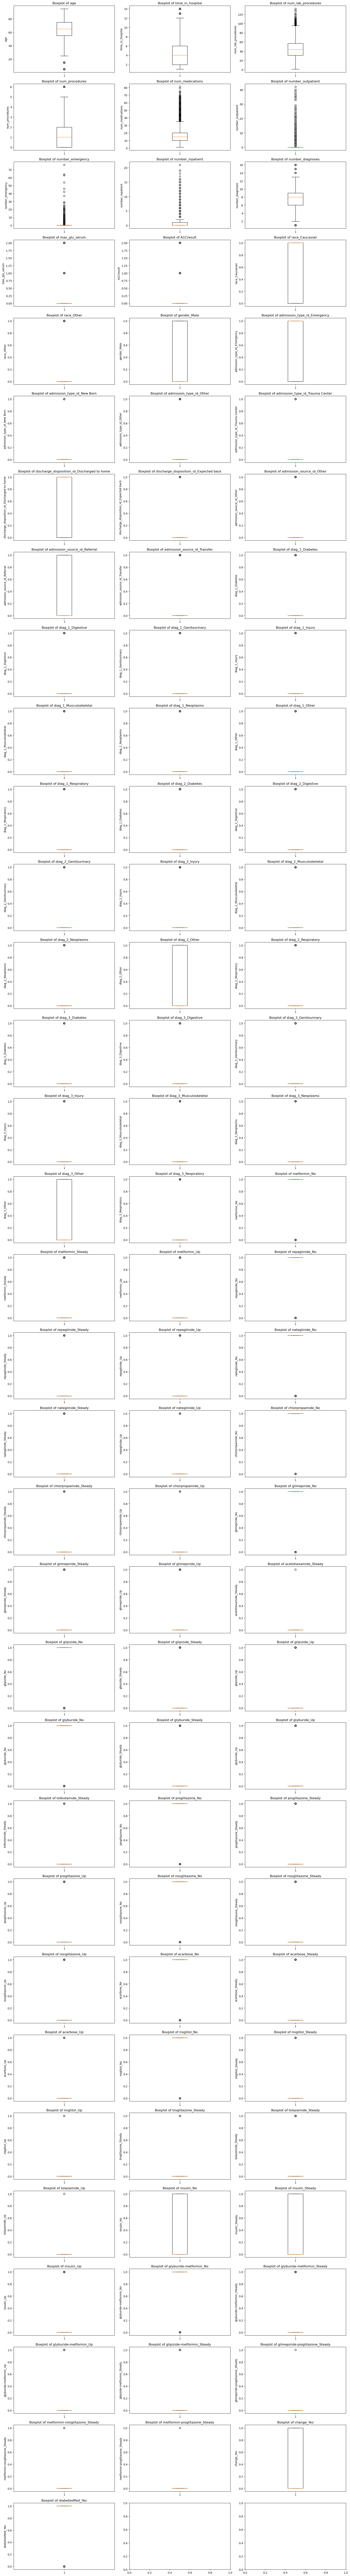

In [1013]:
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))

axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df_encoded[col])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [1014]:
numeric_cols1 = df_encoded.select_dtypes(include=['number']).columns
len(numeric_cols1)

98

In [1015]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [1016]:
df_no_outliers = remove_outliers_iqr(df_encoded, numeric_cols)
#df_no_outliers = data

In [1017]:
df_no_outliers['readmitted'].unique()

array([0, 1], dtype=int64)

time_in_hospital, num_lab_procedures, num_medications have outliers

In [1018]:
outlier_dict = {}
outlier_feat=['time_in_hospital', 'num_lab_procedures', 'num_medications']
for col in outlier_feat:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df_encoded[(df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_dict[col] = {
            'count': outliers.shape[0],
            'outlier_values': outliers[col].unique()
        }

In [1019]:
for col, details in outlier_dict.items():
    print(f"\nFeature: {col}")
    print(f"  → Outlier count: {details['count']}")
    print(f"  → Outlier values: {sorted(details['outlier_values'])}")


Feature: time_in_hospital
  → Outlier count: 2186
  → Outlier values: [13, 14]

Feature: num_lab_procedures
  → Outlier count: 122
  → Outlier values: [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 118, 120, 121, 126, 129, 132]

Feature: num_medications
  → Outlier count: 2470
  → Outlier values: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 79, 81]


33


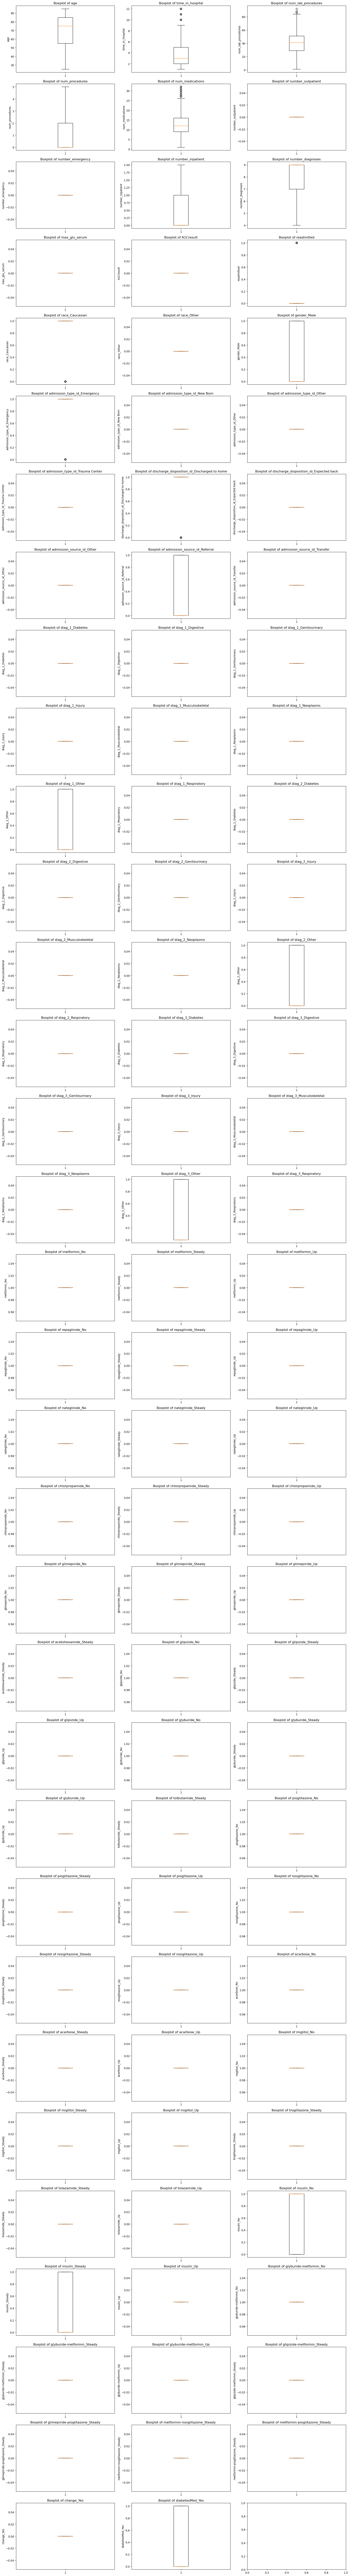

In [1020]:

numeric_cols1 = df_no_outliers.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(len(numeric_cols1) / n_cols)+1
print(n_rows)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))

axs = axs.flatten()

for i, col in enumerate(numeric_cols1):
    axs[i].boxplot(df_no_outliers[col])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [1021]:
print("Original shape:", df_original.shape)
print("After scaling and dropping column:", df_encoded.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (101766, 50)
After scaling and dropping column: (100111, 98)
After removing outliers: (2812, 98)


In [1022]:
df_no_outliers.to_csv('diabetic_data_cleaned.csv', mode='w',index=False)

In [1023]:
df_no_outliers.shape

(2812, 98)

In [1024]:
#df_encoded.to_csv('diabetic_data_encoded.csv', mode='w', index='false') - With Outliers
#df_no_outliers.to_csv('diabetic_data_cleanedOH.csv', mode='w',index=False)